In [1]:
%matplotlib inline

In [1]:
import os
import sys
import pandas
import itertools
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from glob import glob
from sklearn import cluster
from sklearn.mixture import GaussianMixture
from nilearn import plotting
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

sys.path.insert(0,'/home/users/jvogel/git/data_driven_pathology/esm/')
#sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology/esm/')
import ESM_utils as esm


In [4]:
# Work computer
bf = pandas.read_csv('/home/users/jvogel/Science/ESM/VISIT_JUNE2018/bf_Brainnectome_vals.csv',
                    index_col=0)
bf = bf.dropna()
adni = pandas.read_csv('/home/users/jvogel/Science/ESM/VISIT_JUNE2018/adni_Brainnectome_vals.csv',
                      index_col=0)
allsubs = pandas.concat([bf, adni])

In [5]:
# Laptop
bf = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/VISIT_JUNE2018/bf_Brainnectome_vals.csv',
                    index_col=0)
bf = bf.dropna()
adni = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/VISIT_JUNE2018/adni_Brainnectome_vals.csv',
                      index_col=0)
allsubs = pandas.concat([bf, adni])

In [ ]:
[x for x in ]

In [5]:
df = pandas.read_csv('/home/users/jvogel/Science/ESM/VISIT_JUNE2018/ESM_data_DEMOS.csv', index_col = 1)
#df = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/VISIT_JUNE2018/ESM_data_DEMOS.csv', index_col = 1)
badind = [x for x in allsubs.index if x not in df.index]
allsubs.drop(badind,inplace=True)
df = df.loc[allsubs.index]
fulldf = pandas.DataFrame(allsubs, copy=True)
for col in df.columns[79:]:
    fulldf.loc[:,col] = df.loc[:,col].values

In [31]:
fulldf.head()

roi_1     roi_2     roi_3     roi_4     roi_5     roi_6  \
TauPET003  1.105062  1.062412  1.010618  1.022387  0.998605  1.002209   
TauPET004  1.025881  1.113502  1.208175  1.521373  1.169172  1.497016   
TauPET005  1.128021  1.319746  1.495563  1.587181  1.175788  1.171619   
TauPET006  1.000003  0.959631  1.067591  1.041241  1.011506  0.943198   
TauPET007  0.847582  0.923238  0.935502  0.884775  0.936106  0.899647   

              roi_7     roi_8     roi_9    roi_10   ...    Sex  Education  \
TauPET003  1.027945  0.995567  1.103924  1.026087   ...    2.0        9.0   
TauPET004  0.965046  1.010273  0.901576  0.833224   ...    2.0       10.0   
TauPET005  1.528817  1.875058  1.202822  1.393923   ...    1.0       17.0   
TauPET006  0.976640  1.013608  1.021807  0.971417   ...    2.0       10.0   
TauPET007  0.889782  0.938750  0.828923  0.894648   ...    2.0       14.5   

           ApoE      Dx  Amyloid_Status  CDR  CDRSB  MMSE  DX_simple  cohort  
TauPET003   0.0  Normal             0.0  0.0    0.0    27         CN    BioF  
TauPET004   1.0      AD             1.0  1.0    8.0    21         AD    BioF  
TauPET005   1.0      AD             1.0  1.0    4.5    26         AD    BioF  
TauPET006   0.0      AD             1.0  1.0    4.5    27         AD    BioF  
TauPET007   0.0  Normal             0.0  0.0    0.0    28         CN    BioF  

[5 rows x 259 columns]

In [40]:
fulldf.columns[:-13]

Index(['roi_1', 'roi_2', 'roi_3', 'roi_4', 'roi_5', 'roi_6', 'roi_7', 'roi_8',
       'roi_9', 'roi_10',
       ...
       'roi_237', 'roi_238', 'roi_239', 'roi_240', 'roi_241', 'roi_242',
       'roi_243', 'roi_244', 'roi_245', 'roi_246'],
      dtype='object', length=246)

In [6]:
AmP = pandas.DataFrame(fulldf[fulldf.Amyloid_Status==1][fulldf.columns[:-13]], copy=True)
AmN = pandas.DataFrame(fulldf[fulldf.Amyloid_Status==0][fulldf.columns[:-13]], copy=True)

In [7]:
mods = {'1comp': GaussianMixture(n_components=1),
        '2comp': GaussianMixture(n_components=2)}

In [8]:
all_probs, all_report = esm.Convert_ROI_values_to_Probabilities(allsubs, models=mods)

3 ROIs showed unexpected fitting behavior. See report...


In [9]:
#AmP_probs, AmP_report = esm.Convert_ROI_values_to_Probabilities(AmP,norm_matrix=allsubs, models=mods)
AmP_probs = all_probs.loc[AmP.index]

In [10]:
#AmN_probs, AmN_report = esm.Convert_ROI_values_to_Probabilities(AmN,norm_matrix=allsubs, models=mods)
AmN_probs = all_probs.loc[AmN.index]

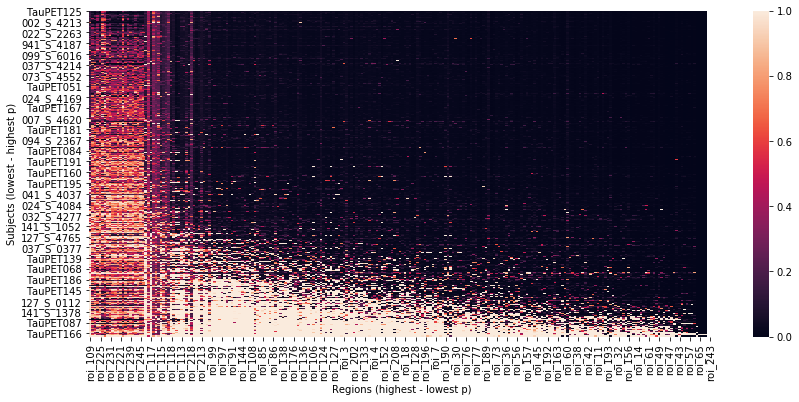

Index(['roi_109', 'roi_241', 'roi_236', 'roi_219', 'roi_225', 'roi_238',
       'roi_228', 'roi_233', 'roi_231', 'roi_230',
       ...
       'roi_57', 'roi_58', 'roi_67', 'roi_41', 'roi_65', 'roi_191', 'roi_194',
       'roi_237', 'roi_243', 'roi_244'],
      dtype='object', length=246)

In [11]:
esm.Plot_Probabilites(all_probs)

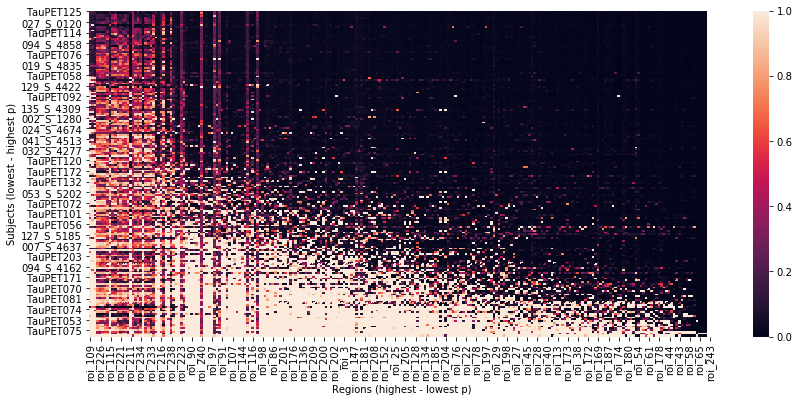

Index(['roi_109', 'roi_110', 'roi_117', 'roi_225', 'roi_226', 'roi_230',
       'roi_229', 'roi_239', 'roi_115', 'roi_220',
       ...
       'roi_58', 'roi_57', 'roi_67', 'roi_41', 'roi_65', 'roi_191', 'roi_194',
       'roi_237', 'roi_243', 'roi_244'],
      dtype='object', length=246)

In [12]:
esm.Plot_Probabilites(AmP_probs)

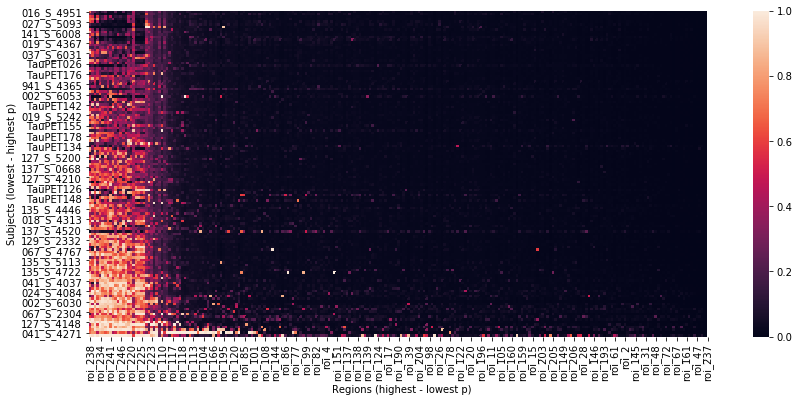

Index(['roi_238', 'roi_228', 'roi_233', 'roi_227', 'roi_234', 'roi_231',
       'roi_232', 'roi_245', 'roi_241', 'roi_236',
       ...
       'roi_44', 'roi_131', 'roi_53', 'roi_47', 'roi_184', 'roi_58', 'roi_41',
       'roi_237', 'roi_243', 'roi_244'],
      dtype='object', length=243)

In [13]:
esm.Plot_Probabilites(AmN_probs)

In [14]:
#input_data = all_probs.dropna(1)
in_all_p = all_probs.dropna(1)
cx_all_p = pandas.DataFrame(np.corrcoef(in_all_p))

in_all = allsubs.dropna(1)
cx_all = pandas.DataFrame(np.corrcoef(in_all))

in_AmP_p = AmP_probs.dropna(1)
cx_AmP_p = pandas.DataFrame(np.corrcoef(in_AmP_p))

in_AmP = AmP.dropna(1)
cx_AmP = pandas.DataFrame(np.corrcoef(in_AmP))

in_AmN_p = AmN_probs.dropna(1)
cx_AmN_p = pandas.DataFrame(np.corrcoef(in_AmN_p))

in_AmN = AmN.dropna(1)
cx_AmN =pandas.DataFrame(np.corrcoef(in_AmN))

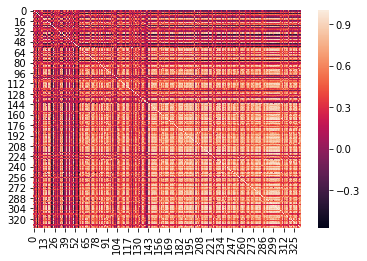

In [15]:
sns.heatmap(cx_all_p)

In [40]:
sns.clustermap?

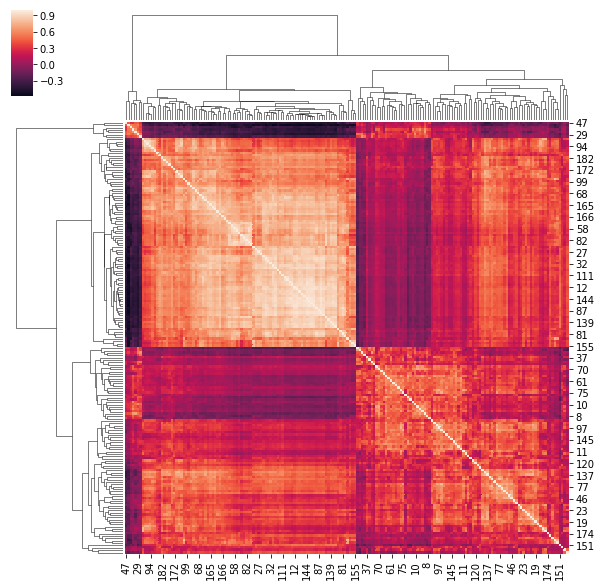

In [16]:
sns.clustermap(cx_AmP_p)

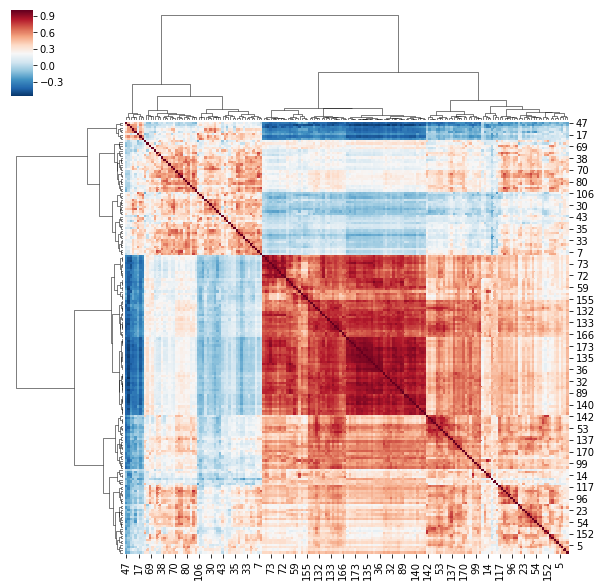

In [16]:
sns.clustermap(cx_AmP_p, method='ward', cmap='RdBu_r')

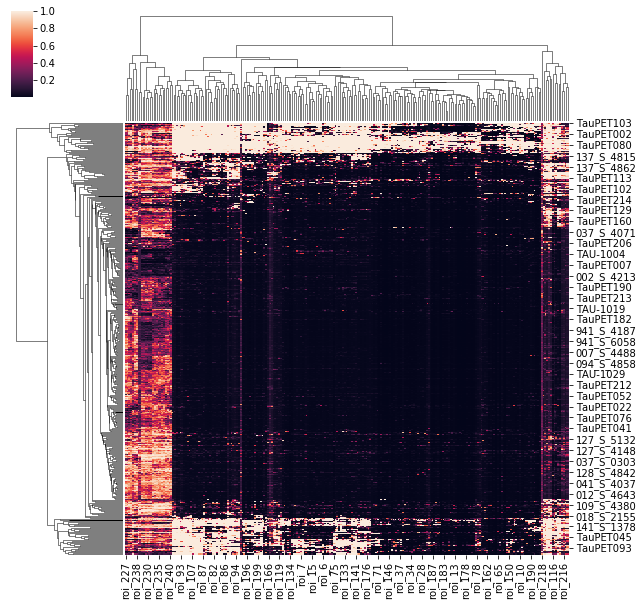

In [45]:
sns.clustermap(all_probs.dropna(1))

In [49]:
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

ks = range(2,20)
#X = g.data2d.values
X = np.array(sub_cx, copy=True)
cluster_solutions_1 = pandas.DataFrame(index = ks, columns = ['silhouette', 'CH_index',
                                                            'mean_size','min_size','max_size'])
connectivity = kneighbors_graph(X, n_neighbors=20, include_self=False)
for k in ks:
    clusterer = AgglomerativeClustering(n_clusters=k, connectivity=connectivity)
    cluster_labels = clusterer.fit_predict(X)
    # silhouette
    cluster_solutions_1.loc[k,'silhouette'] = silhouette_score(X, cluster_labels)
    # CH Index
    cluster_solutions_1.loc[k,'CH_index'] = calinski_harabaz_score(X, cluster_labels)
    mtx = pandas.DataFrame(X, copy=True)
    mtx.loc[:,'label'] = cluster_labels
    sizes = []
    for i in np.unique(mtx.label):
        clus_data = mtx[mtx.label==i][mtx.columns[:-1]]
        sizes.append(len(clus_data))
    # SIZES
    cluster_solutions_1.loc[k,'mean_size'] = np.mean(sizes)
    cluster_solutions_1.loc[k,'min_size'] = np.min(sizes)
    cluster_solutions_1.loc[k,'max_size'] = np.max(sizes)
   
    print('finished',k)

finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19


In [51]:
cluster_solutions_1.loc[:,'k'] = range(2,20)

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


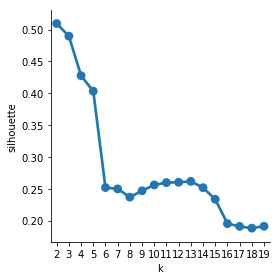

In [52]:
sns.factorplot(x='k', y='silhouette', data=cluster_solutions_1)

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


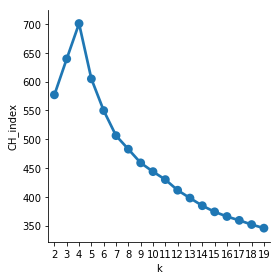

In [53]:
sns.factorplot(x='k', y='CH_index', data=cluster_solutions_1)

In [ ]:
k = 
connectivity = kneighbors_graph(X, n_neighbors=20, include_self=False)
clusterer = AgglomerativeClustering(n_clusters=k, connectivity=connectivity)

#### Other methods for clustering
* Stability (cluster half sample, predict other half, then cluster other half and compare to predicted
* Community detection?
* Silhouette?


In [55]:
k = 13
clusterer = AgglomerativeClustering(n_clusters=k, connectivity=connectivity)
cluster_labels = clusterer.fit_predict(X)

In [32]:
#atl_pth = '/Users/jakevogel/Science/Brainnectome/BN_Atlas_246_1mm.nii'
atl_pth = '/home/users/jvogel/Science/templates/atlases/Brainnectome/BN_Atlas_246_1mm.nii'

In [27]:
rois = [int(x.split('_')[-1]) for x in allsubs.columns]
#rois

In [164]:
connectivity?

In [29]:
# VISUALIZE
def visualize_clusters(matrix, roi_labels, clust_labels, atlas_pth, 
                       illustrative=False, thresh = None):
    
    if matrix.shape[0] != len(clust_labels):
        matrix = matrix.T
    if type(matrix) == np.ndarray:
        matrix = pandas.DataFrame(matrix)
    else:
        matrix = pandas.DataFrame(matrix, copy=True)
    matrix.columns = roi_labels
    matrix.loc[:,'label'] = clust_labels
    
    atl_img = ni.load(atlas_pth)
    aff = atl_img.affine
    atl = atl_img.get_data()
    u = np.unique(atl)[1:]
    
    clust_imgs = {}
    for label in np.unique(clust_labels):
        print('working on cluster',label)
        clust_vals = matrix[matrix.label==label].mean()
        clust_dat = np.zeros_like(atl).astype(np.float32)
        for i in u:
            if i in roi_labels:
                clust_dat[atl==i] = clust_vals.loc[i]
        clust_img = ni.Nifti1Image(clust_dat, aff)
        clust_imgs.update({label: clust_img})
        if illustrative:
            n = len(matrix[matrix.label==label])
            print('cluster size = ',n)
            if len(clust_dat[clust_dat>thresh]) == 0:
                print('no rois above specified threshold. loosening threshold')
                nthresh = thresh / 0.5
                if len(clust_dat[clust_dat>nthresh]) == 0:
                    print('no rois above loosened threshold. no threshold applied')
                    nthresh = None
                plotting.plot_stat_map(clust_img, threshold = nthresh, draw_cross=False)
            else:
                plotting.plot_stat_map(clust_img, threshold = thresh, draw_cross=False)
            plt.show()
            
    return clust_imgs

working on cluster 0
cluster size =  24


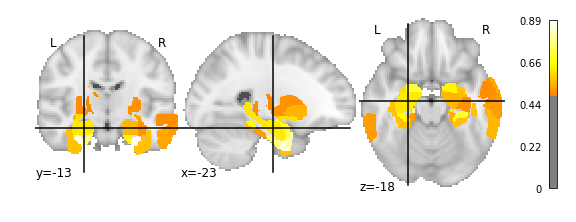

working on cluster 1
cluster size =  25


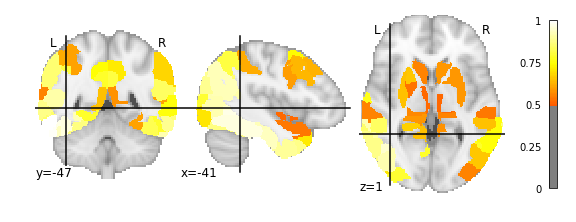

working on cluster 2
cluster size =  12


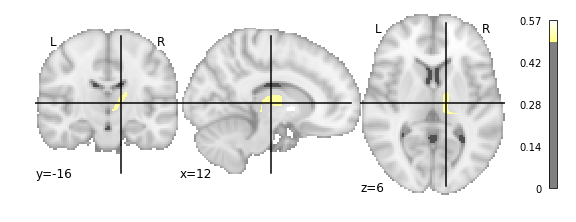

working on cluster 3
cluster size =  41


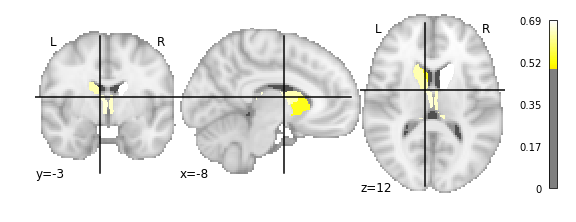

working on cluster 4
cluster size =  11


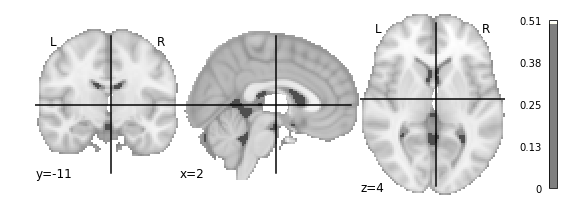

working on cluster 5
cluster size =  68


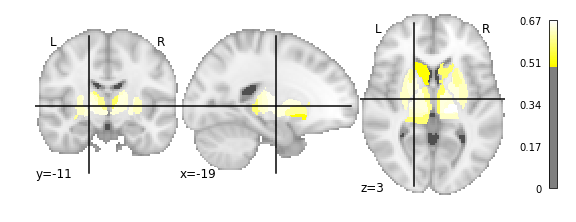

working on cluster 6
cluster size =  6


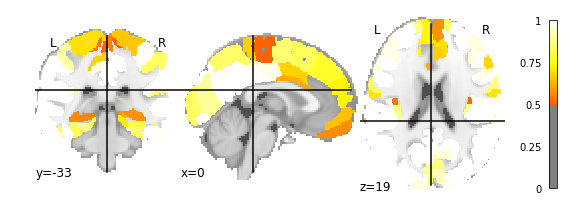

working on cluster 7
cluster size =  9


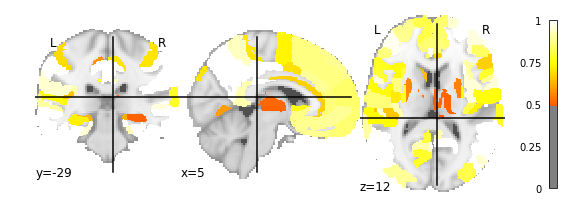

working on cluster 8
cluster size =  37


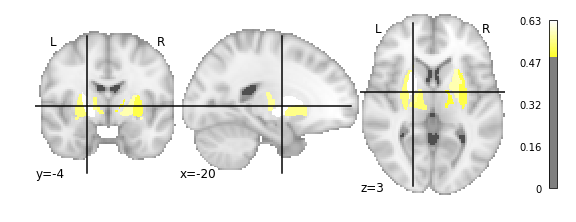

working on cluster 9
cluster size =  16


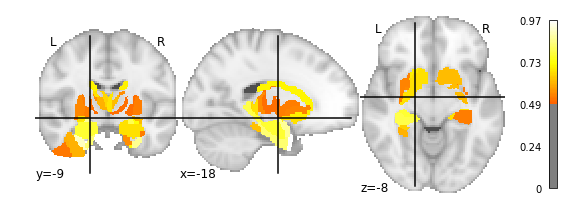

working on cluster 10
cluster size =  17


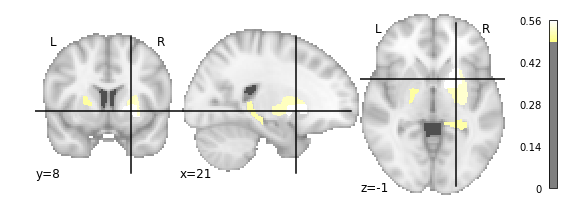

working on cluster 11
cluster size =  4


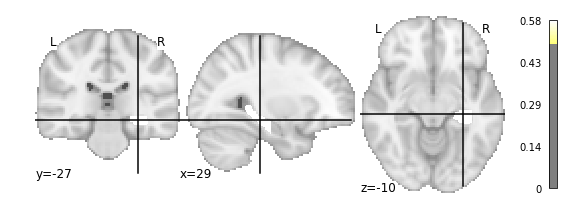

working on cluster 12
cluster size =  25


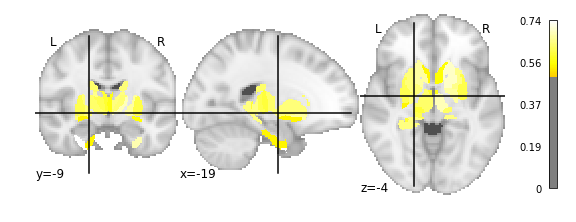

working on cluster 13
cluster size =  15


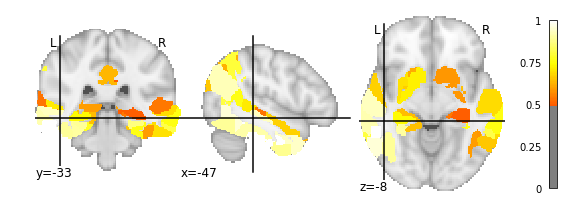

working on cluster 14
cluster size =  17


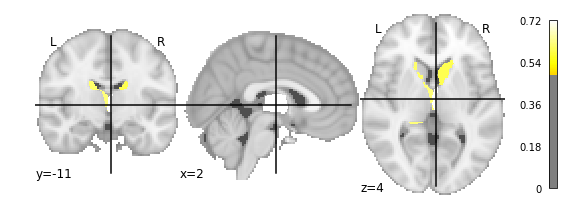

working on cluster 15
cluster size =  66


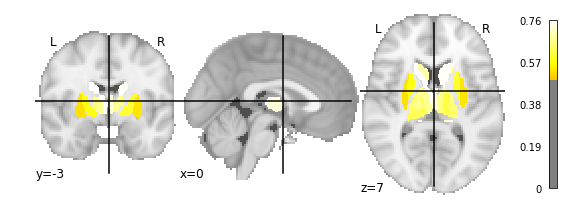

working on cluster 16
cluster size =  13


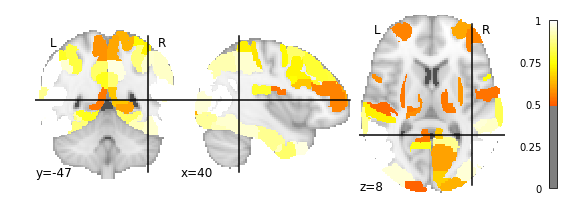

working on cluster 17
cluster size =  21


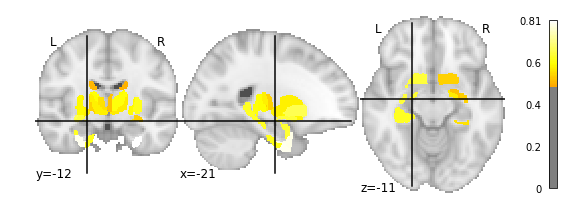

working on cluster 18
cluster size =  9


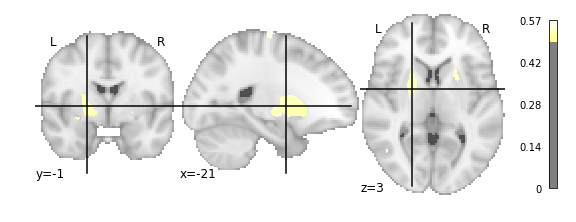

In [151]:
clust_imgs = visualize_clusters(input_data, rois, mtx.label.values, atl_pth, True, 0.5)

In [187]:
#output = poormans_basc(input_data, 3, 10, 1, True, None, True, 30)

In [185]:
calinski_harabaz_score(output['stability'],output['labels'])

2122.7200660720123

In [192]:
silhouette_score(output['stability'],output['labels'])

0.7963185757117955

running cluster analyses
working on iteration 0
working on iteration 1
working on iteration 2
working on iteration 3
working on iteration 4
working on iteration 5
working on iteration 6
working on iteration 7
working on iteration 8
working on iteration 9
creating stability matrix
working on iteration 0
working on iteration 1
working on iteration 2
working on iteration 3
working on iteration 4
working on iteration 5
working on iteration 6
working on iteration 7
working on iteration 8
working on iteration 9


//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


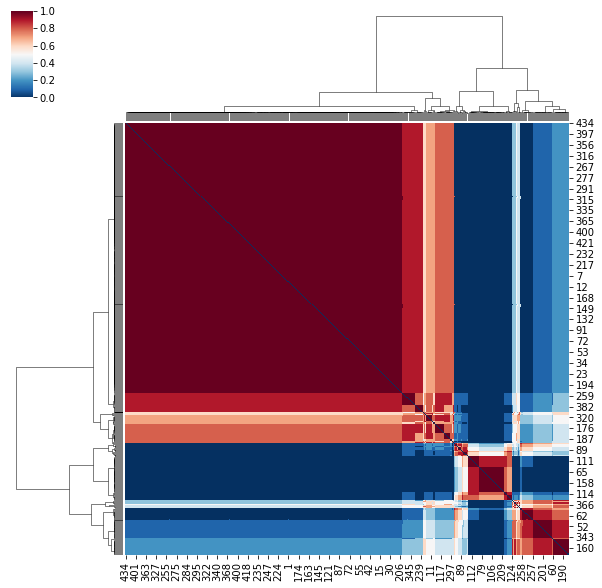

In [191]:
in_cx = pandas.DataFrame(sub_cx)
in_cx.index = input_data.index
in_cx.columns = input_data.index
output = poormans_basc(input_data, 3, 10, 1, True, None, True, 30)

In [30]:
def poormans_basc(in_mtx,n_clust,n_iter,checker,
                  bootstrap = False,
                  inner_cluster_object = None,
                  connect = False, neighbors = 20,
                  plotit = True):
    
    clust_mtx = pandas.DataFrame(index=in_mtx.index, copy=True)
    print('running cluster analyses')
    if type(inner_cluster_object) == type(None):
        inner_cluster_object = cluster.KMeans()
    for i in range(n_iter):
        tmp_mtx = pandas.DataFrame(in_mtx,copy=True)
        if i%checker == 0:
            print('working on iteration',i)
        if bootstrap:
            new_ind = np.random.choice(in_mtx.columns,len(in_mtx.columns))
            tmp_mtx = tmp_mtx[new_ind]
        if connect:
            connectivity = kneighbors_graph(tmp_mtx, n_neighbors=neighbors, 
                                            include_self=False)
            nlabs = cluster.AgglomerativeClustering(n_clust,connectivity=connectivity
                                              ).fit(tmp_mtx).labels_
            clust_mtx.loc[:,'i%s'%i] = nlabs
        else:
            clust_mtx.loc[:,'i%s'%i] = inner_cluster_object.fit(tmp_mtx).labels_
    print('creating stability matrix')
    id_mtx = np.zeros((len(clust_mtx),len(clust_mtx)))
    for i in range(n_iter):
        if i%checker == 0:
            print('working on iteration',i)
        icol = pandas.Series(clust_mtx.values[:,i])
        for u in np.unique(icol):
            id_mtx[[x[0] for x in itertools.combinations(icol[icol==u].index.tolist(),2)],[
                    y[1] for y in itertools.combinations(icol[icol==u].index.tolist(),2)]] += 1
    stab_mtx = id_mtx/n_iter
    
    stab_mtx[np.tril_indices_from(stab_mtx)] = stab_mtx.transpose()[
                                            np.tril_indices_from(stab_mtx)]
    
    if plotit:
        plt.close()
        sns.clustermap(stab_mtx, cmap = 'RdBu_r')
        plt.show()
    
    connectivity = kneighbors_graph(stab_mtx, n_neighbors=neighbors, include_self=False)
    aggclust = cluster.AgglomerativeClustering(n_clust,connectivity=connectivity
                                              ).fit(stab_mtx)
    
    newdf = pandas.DataFrame(in_mtx, copy=True)
    newdf.loc[:,'order'] = aggclust.labels_
    output = {'cluster_object': aggclust, 'stability': stab_mtx,
              'dataframe': newdf, 'labels': aggclust.labels_}
    
    return output

In [200]:
ks = range(2,21)
basc_results = pandas.DataFrame(index = ks, columns = ['k','silhouette', 'CH_index',
                                                        'mean_size','min_size','max_size'])
basc_results.loc[:,'k'] = ks
for k in ks:
    print('>>>>>>> k = %s <<<<<<<'%k)
    output = poormans_basc(input_data, k, 100, 100, True, None, True, 30, plotit=False)
    # scores
    basc_results.loc[k,'silhouette'] = calinski_harabaz_score(output['stability'],
                                                              output['labels'])
    basc_results.loc[k,'CH_index'] = silhouette_score(output['stability'],
                                                      output['labels'])
    # sizes
    sizes = [len(output['labels'][output['labels']==x]) for x in np.unique(output['labels'])]
    basc_results.loc[k,'mean_size'] = np.mean(sizes)
    basc_results.loc[k,'min_size'] = np.min(sizes)
    basc_results.loc[k,'max_size'] = np.max(sizes)

>>>>>>> k = 2 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 3 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 4 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 5 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 6 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 7 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 8 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 9 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 10 <<<<<<<
running cluster analyses


In [196]:
output['labels'][output['labels']==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


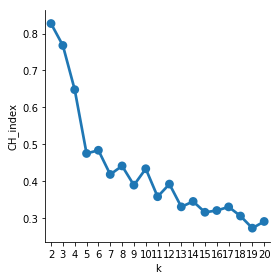

In [202]:
sns.factorplot(x='k', y='CH_index', data=basc_results)

//anaconda/envs/py3/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


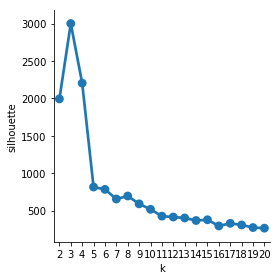

In [203]:
sns.factorplot(x='k', y='silhouette', data=basc_results)

In [90]:
output.keys()

dict_keys(['cluster_object', 'stability', 'dataframe', 'labels'])

In [18]:
data = {'all_p': cx_all_p, 'all': cx_all,
       'AmP_p': cx_AmP_p, 'AmP': cx_AmP,
       'AmN_p': cx_AmN_p, 'AmN': cx_AmN}

In [24]:
all_results = {}
ks = range(2,21)
all_cluster_labels = pandas.DataFrame(index = allsubs.index)
for dataset, input_data in data.items():
    print('************************ %s ***************************'%dataset)
    if 'all' in dataset:
        subs = allsubs.index
    elif 'AmP' in dataset:
        subs = AmP.index
    elif 'AmN' in dataset:
        subs = AmN.index
    basc_results = pandas.DataFrame(index = ks, columns = ['k','silhouette', 'CH_index',
                                                            'mean_size','min_size','max_size'])
    basc_results.loc[:,'k'] = ks
    for k in ks:
        print('>>>>>>> k = %s <<<<<<<'%k)
        output = poormans_basc(input_data, k, 100, 100, True, None, True, 30, plotit=False)
        # scores
        basc_results.loc[k,'silhouette'] = calinski_harabaz_score(output['stability'],
                                                                  output['labels'])
        basc_results.loc[k,'CH_index'] = silhouette_score(output['stability'],
                                                          output['labels'])
        # sizes
        sizes = [len(output['labels'][output['labels']==x]) for x in np.unique(output['labels'])]
        basc_results.loc[k,'mean_size'] = np.mean(sizes)
        basc_results.loc[k,'min_size'] = np.min(sizes)
        basc_results.loc[k,'max_size'] = np.max(sizes)
        
        all_cluster_labels.loc[subs,'%s_%s'%(dataset,k)] = output['labels']
        all_cluster_labels.to_csv('/Users/jakevogel/Science/tau/Chapter3/basc_labels.csv')
    all_results.update({dataset: basc_results})
    all_results[dataset].to_csv(
            '/Users/jakevogel/Science/tau/Chapter3/%s_clustering_stats.csv'%dataset
                                )

************************ all ***************************
>>>>>>> k = 2 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 3 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 4 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 5 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 6 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 7 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 8 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 9 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on ite

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


>>>>>>> k = 4 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 5 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 6 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 7 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 8 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 9 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 10 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 11 <<<<<<<
running cluster analyses
working on iteration 0
creating stability matrix
working on iteration 0
>>>>>>> k = 12 <<<<<<<
running cluster analyse

In [193]:
AmP.index.shape

(184,)

>>>>>>> k = 2 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


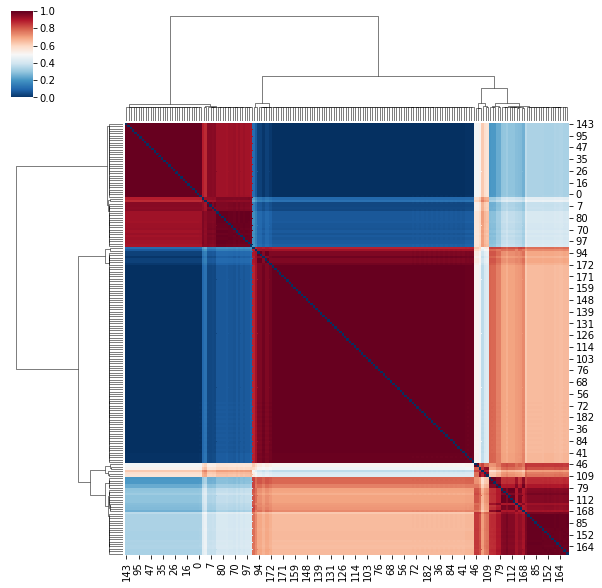

working on cluster 0
working on cluster 1
>>>>>>> k = 3 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


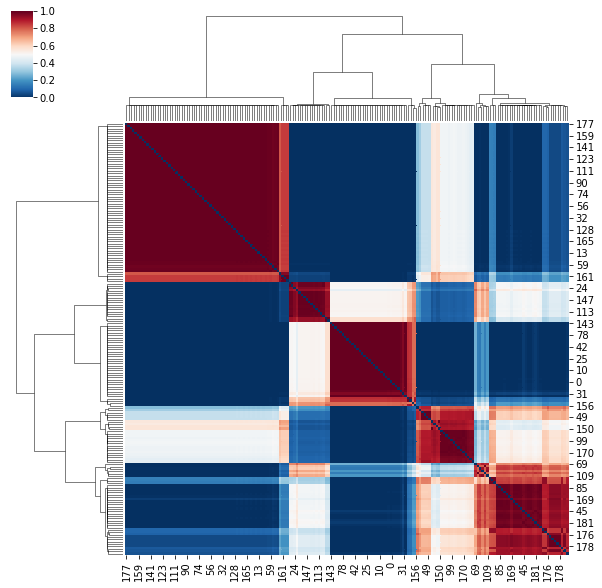

working on cluster 0
working on cluster 1
working on cluster 2
>>>>>>> k = 4 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


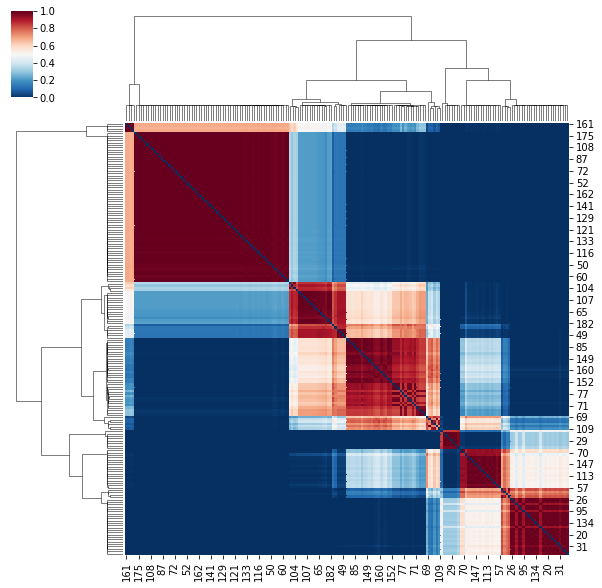

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
>>>>>>> k = 5 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


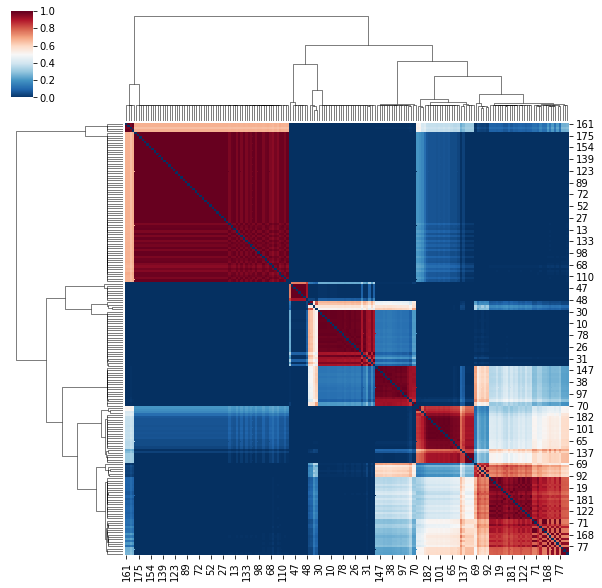

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
>>>>>>> k = 6 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


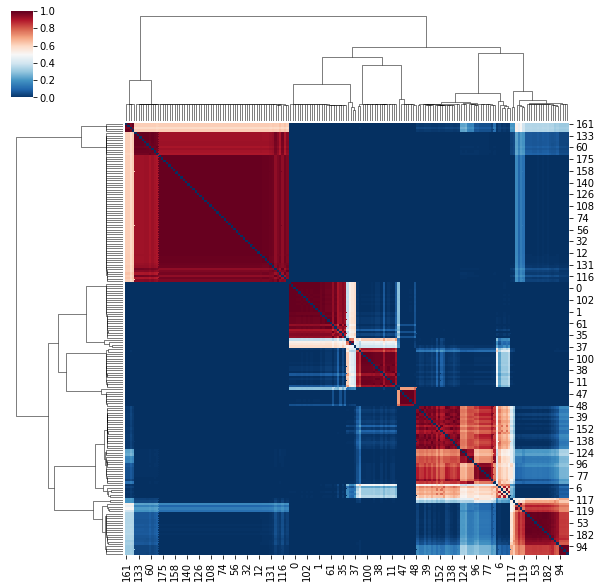

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
>>>>>>> k = 7 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


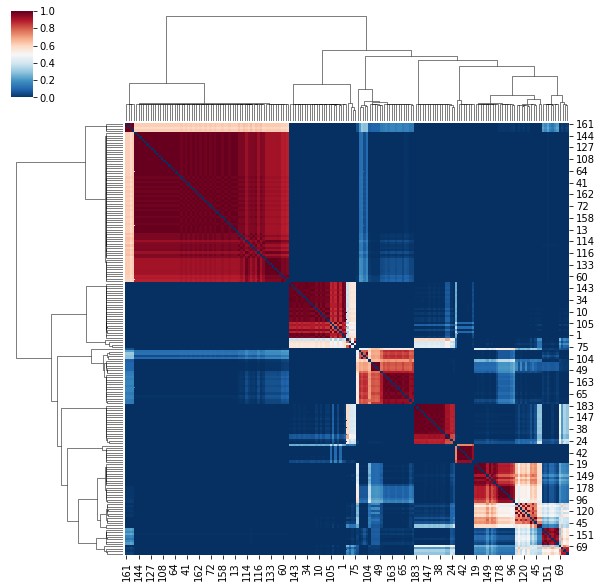

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
>>>>>>> k = 8 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


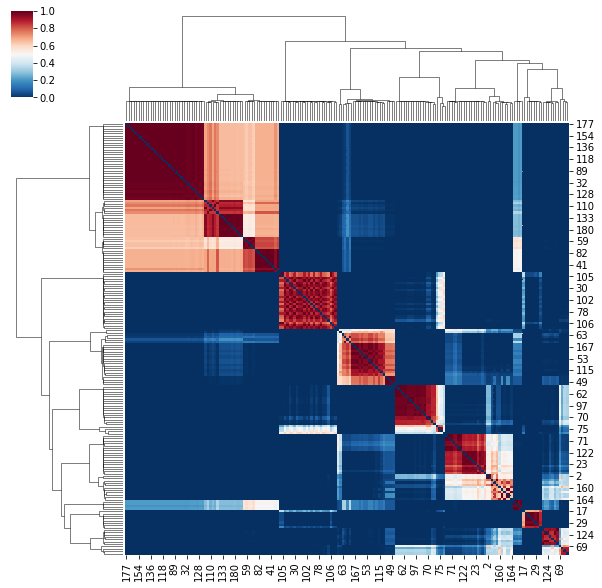

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
>>>>>>> k = 9 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


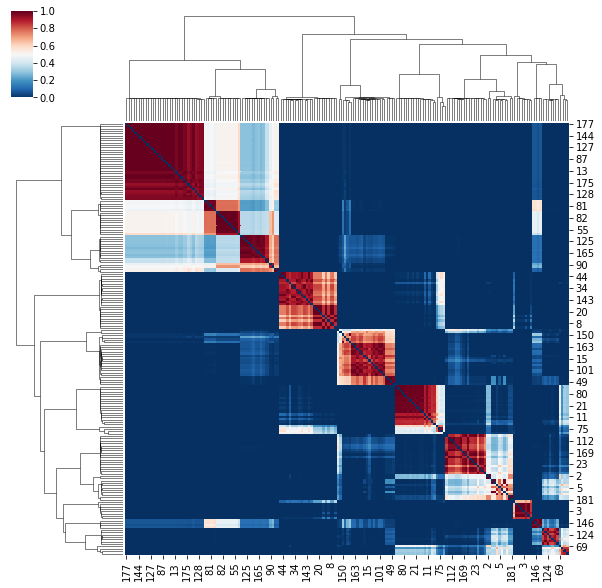

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
>>>>>>> k = 10 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


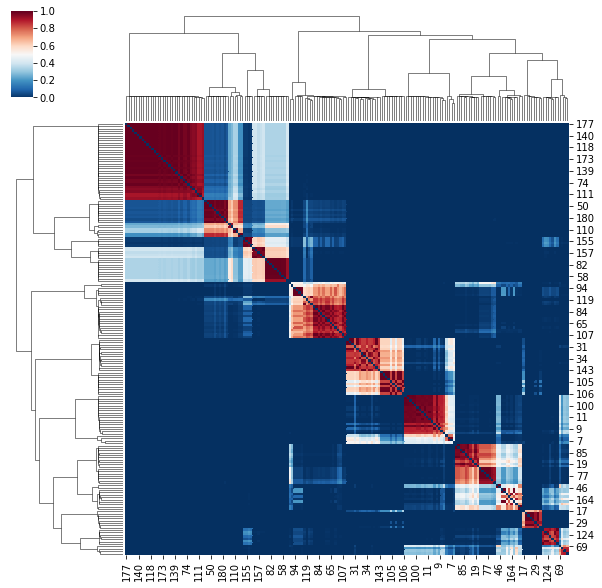

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
>>>>>>> k = 11 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


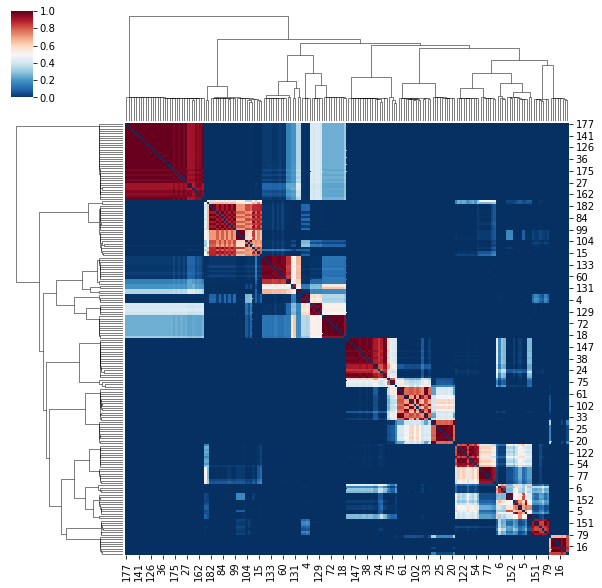

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
>>>>>>> k = 12 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


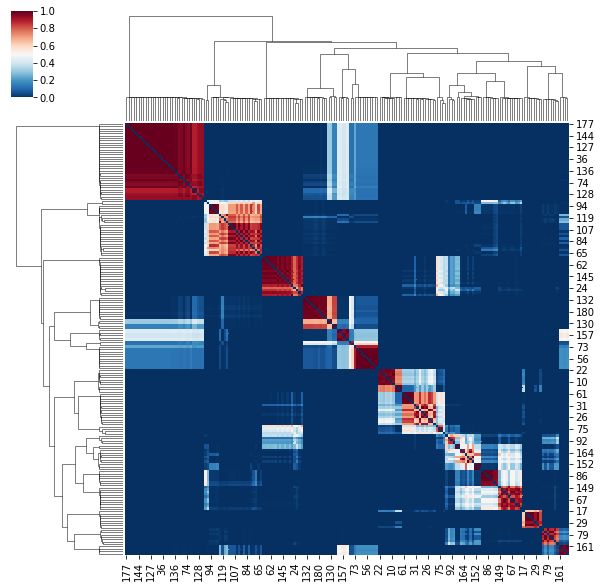

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
>>>>>>> k = 13 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


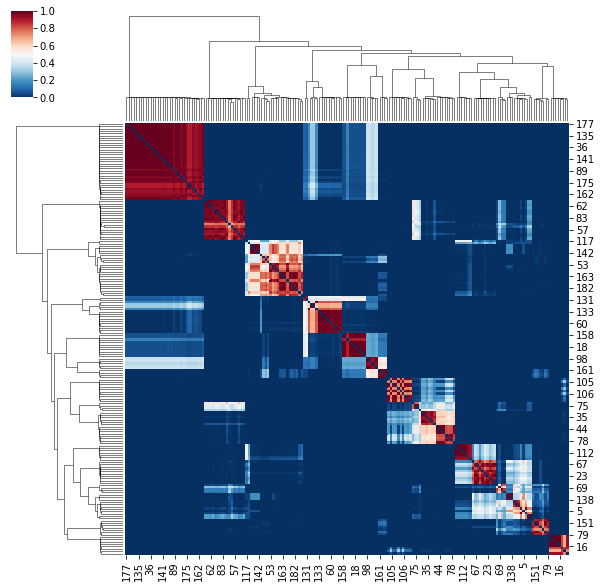

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
>>>>>>> k = 14 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


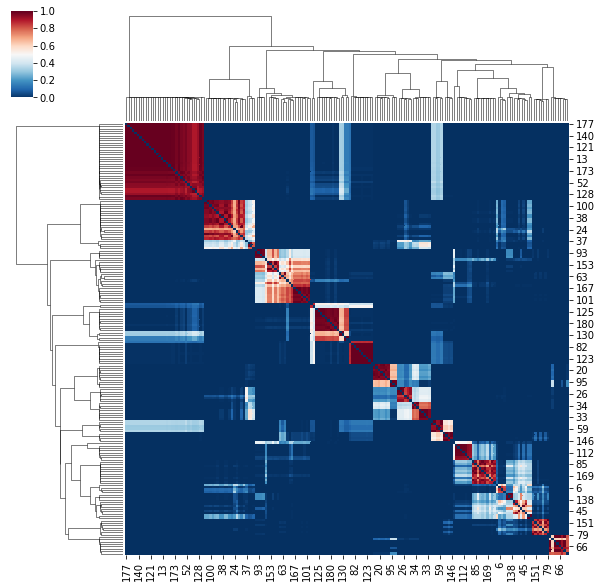

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
>>>>>>> k = 15 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


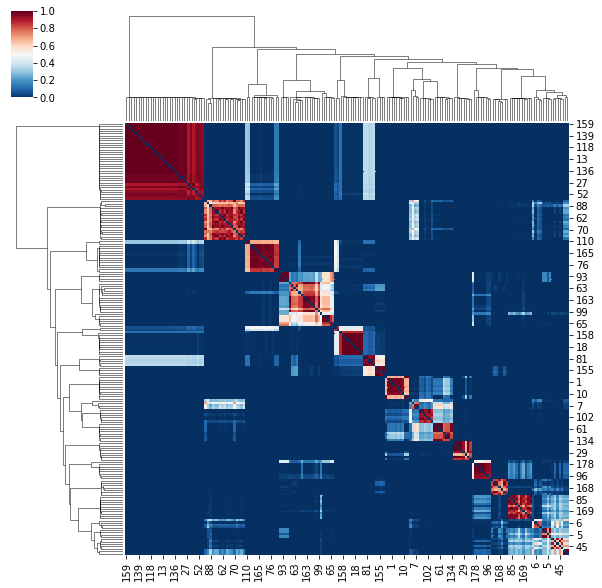

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
>>>>>>> k = 16 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


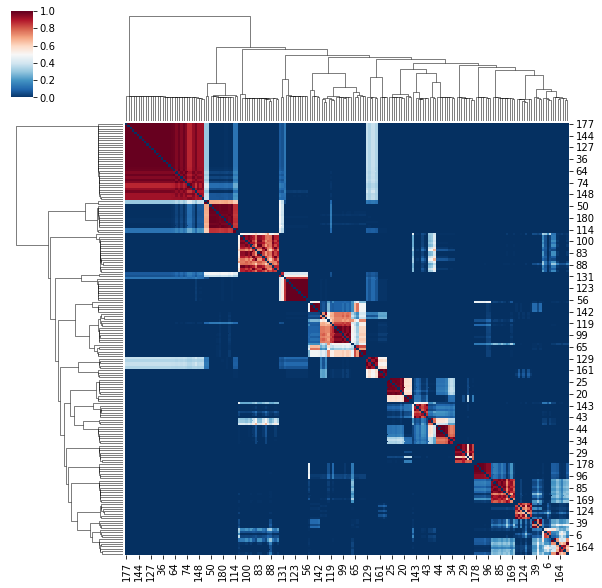

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
>>>>>>> k = 17 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


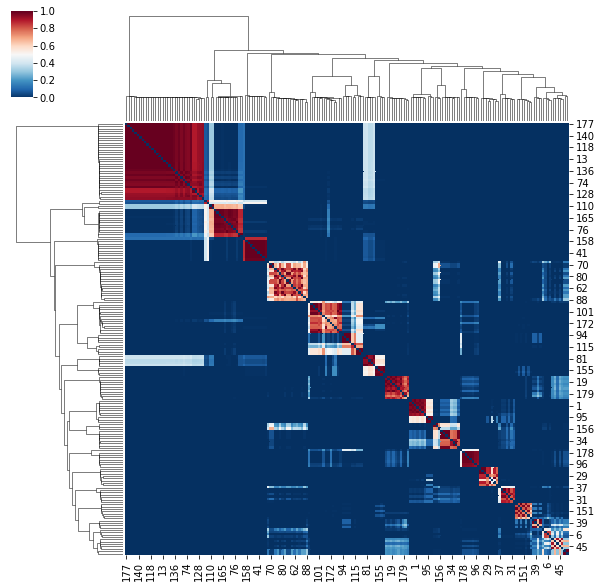

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
>>>>>>> k = 18 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


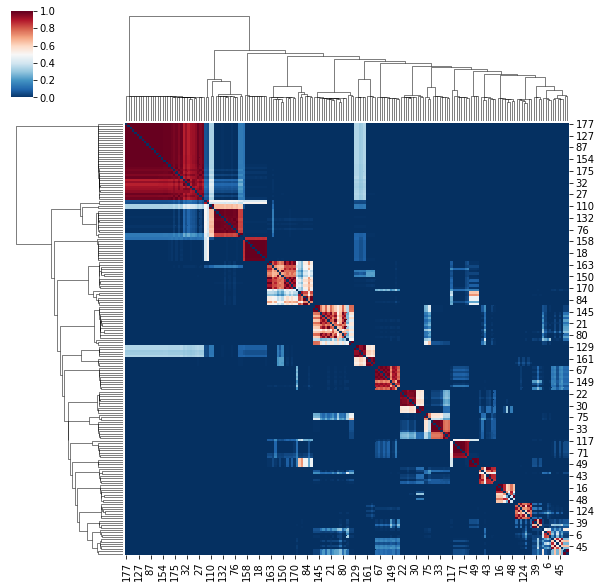

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
>>>>>>> k = 19 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


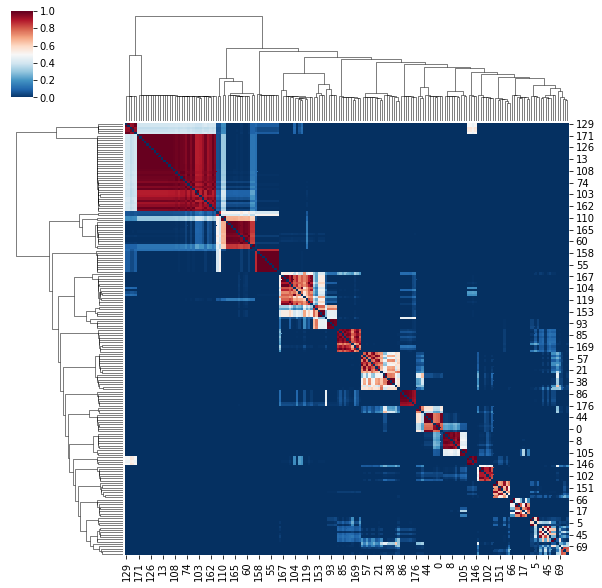

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
working on cluster 18
>>>>>>> k = 20 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


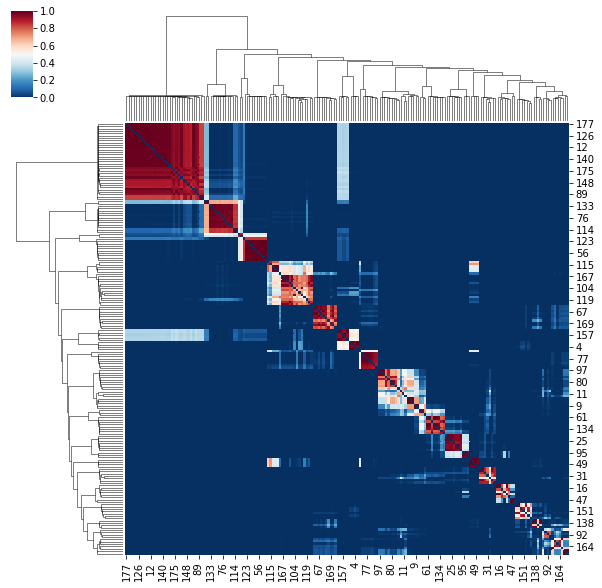

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
working on cluster 18
working on cluster 19


In [195]:
ks = range(2,21)
basc_results = pandas.DataFrame(index = ks, columns = ['k','silhouette', 'CH_index',
                                                            'mean_size','min_size','max_size'])
AmP_cluster_labels = pandas.DataFrame(index = AmP.index, columns = ks)
for k in ks:
    print('>>>>>>> k = %s <<<<<<<'%k)
    ### cluster
    output = poormans_basc(cx_AmP_p, k, 500, 100, True, None, True, 30, plotit=True)
    ### run stats
    # scores
    basc_results.loc[k,'CH_index'] = calinski_harabaz_score(output['stability'],
                                                              output['labels'])
    basc_results.loc[k,'silhouette'] = silhouette_score(output['stability'],
                                                      output['labels'])
    # sizes
    sizes = [len(output['labels'][output['labels']==x]) for x in np.unique(output['labels'])]
    basc_results.loc[k,'mean_size'] = np.mean(sizes)
    basc_results.loc[k,'min_size'] = np.min(sizes)
    basc_results.loc[k,'max_size'] = np.max(sizes)
    
    ### save labels
    AmP_cluster_labels.loc[:,k] = output['labels']
    AmP_cluster_labels.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_labels.csv')
    
    ### save matrices
    stab = pandas.DataFrame(output['stability'], index = AmP.index, columns = AmP.index)
    stab.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_stability_%s.csv'%k)
    
    ### save images
    clust_imgs = visualize_clusters(AmP_probs, rois, output['labels'], atl_pth, False)
    for ik, img in clust_imgs.items():
        img.to_filename('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k%s_clus%s'%(k,ik))

basc_results.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_clustering_stats.csv')

In [188]:
clust_imgs[0]

In [186]:
pandas.DataFrame(output['stability']).shape

(184, 184)

In [17]:
all_cluster_labels = pandas.read_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/basc_labels.csv',
                                    index_col = 0)
all_cluster_labels.head()

all_2  all_3  all_4  all_5  all_6  all_7  all_8  all_9  all_10  \
TauPET003      0      0      0      2      4      0      1      6       8   
TauPET004      1      2      3      1      5      5      0      3       9   
TauPET005      1      2      3      1      5      5      0      0       5   
TauPET006      0      1      1      3      3      4      7      4       1   
TauPET007      0      0      2      0      0      2      2      8       7   

           all_11   ...    AmN_11  AmN_12  AmN_13  AmN_14  AmN_15  AmN_16  \
TauPET003       1   ...       5.0     5.0     6.0     9.0     5.0     4.0   
TauPET004       8   ...       NaN     NaN     NaN     NaN     NaN     NaN   
TauPET005       0   ...       NaN     NaN     NaN     NaN     NaN     NaN   
TauPET006      10   ...       NaN     NaN     NaN     NaN     NaN     NaN   
TauPET007       3   ...       6.0     2.0     5.0     0.0     0.0    12.0   

           AmN_17  AmN_18  AmN_19  AmN_20  
TauPET003     0.0     1.0     1.0    18.0  
TauPET004     NaN     NaN     NaN     NaN  
TauPET005     NaN     NaN     NaN     NaN  
TauPET006     NaN     NaN     NaN     NaN  
TauPET007     1.0     2.0     2.0     0.0  

[5 rows x 114 columns]

In [25]:
all_results = {}
ncols = ['k', 'CH_index', 'silhouette', 'mean_size', 'min_size', 'max_size']
for dataset,_ in data.items():
    jnk = pandas.read_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/%s_clustering_stats.csv'%dataset,
                         index_col = 0)
    jnk.columns = ncols
    all_results.update({dataset: jnk})

In [20]:
# all_cluster_labels.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/basc_labels.csv')
# for dataset, res in all_results.items():
#     res.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/%s_clustering_stats.csv'%dataset)

# To do
* Re-evaluate cluster solutions (DONE)
* Characterize (MMSE/SDRSB)
* Predict AmNegs (correlation to cluster averages)
* Look at higher resolution
* Make slides

>>>all_p<<<


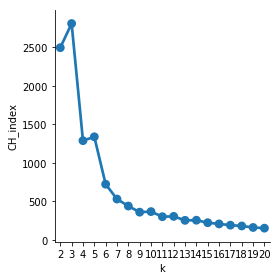

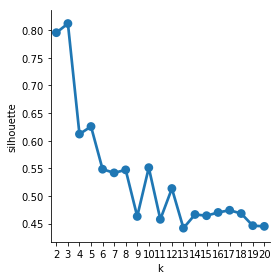

>>>all<<<


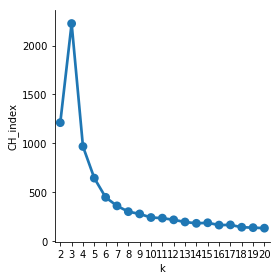

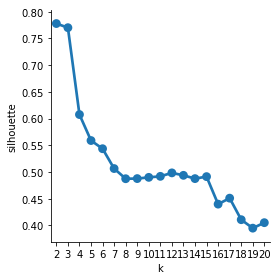

>>>AmP_p<<<


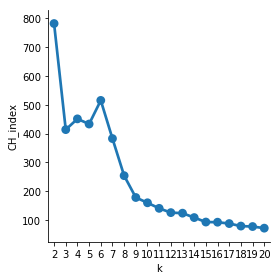

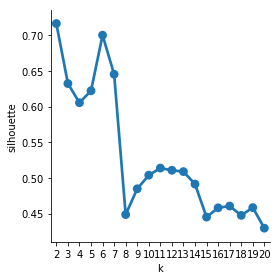

>>>AmP<<<


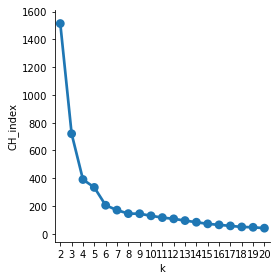

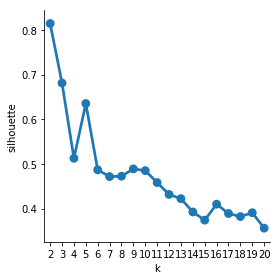

>>>AmN_p<<<


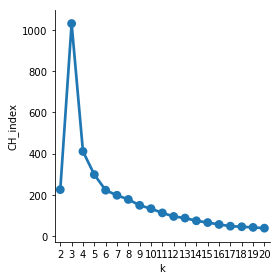

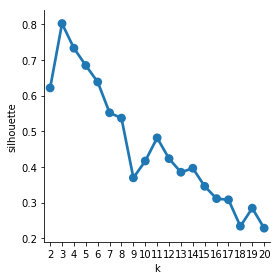

>>>AmN<<<


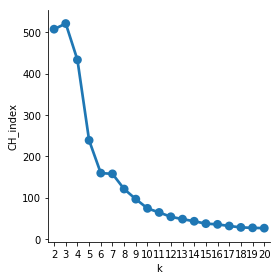

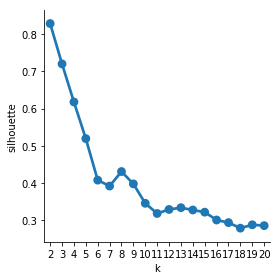

In [26]:
for dataset, res in all_results.items():
    print('>>>%s<<<'%dataset)
    plt.close()
    sns.factorplot(x='k', y='CH_index', data=res)
    plt.show()
    plt.close()
    sns.factorplot(x='k', y='silhouette', data=res)
    plt.show()

In [199]:
basc_results.loc[:,'k'] = ks

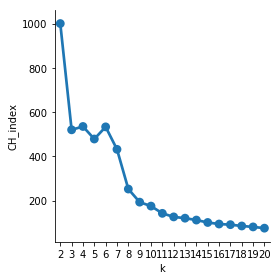

In [200]:
sns.factorplot(x='k', y = 'CH_index', data = basc_results)

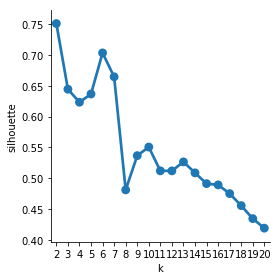

In [201]:
sns.factorplot(x='k', y = 'silhouette', data = basc_results)

In [196]:
for k in [2, 3, 4]:
    print('>>>>>>>> K = %s <<<<<<<<'%k)
    output = poormans_basc(input_data, k, 100, 100, True, None, True, 30, plotit=False)
    clust_imgs = visualize_clusters(input_data, rois, output['labels'], atl_pth, True, 0.5)

In [238]:
good_fits = [x for x in range(len(jnk)) if jnk[x]>0]

In [242]:
newlabs = output['labels'][good_fits]

In [202]:
for k in [2, 3, 4]:
    print('>>>>>>>> K = %s <<<<<<<<'%k)
    output = poormans_basc(input_data, k, 100, 100, True, None, True, 30, plotit=False)
    jnk = silhouette_samples(output['stability'],output['labels'])
    good_fits = [x for x in range(len(jnk)) if jnk[x]>0]
    tmp_mtx = input_data.loc[input_data.index[good_fits]]
    newlabs = output['labels'][good_fits]
    clust_imgs = visualize_clusters(tmp_mtx, rois, newlabs, atl_pth, True, 0.5)

In [224]:
from sklearn.metrics import silhouette_samples

In [228]:
jnk = silhouette_samples(output['stability'],output['labels'])

//anaconda/envs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


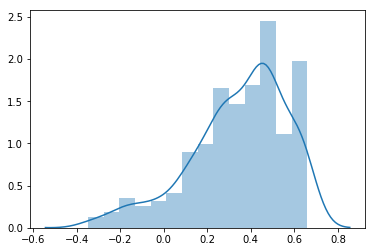

In [231]:
sns.distplot(jnk)

In [203]:
#rois = [int(x.split('_')[-1]) for x in AmP.columns]
cluster_viz = {}
for k in [2, 3, 6, 13]:
    print('>>>>>>>> K = %s <<<<<<<<'%k)
    output = poormans_basc(cx_AmP_p, k, 100, 100, True, None, True, 30, plotit=True)
    clust_imgs = visualize_clusters(AmP_probs, rois, output['labels'], atl_pth, True, 0.5)
    cluster_viz.update({k: clust_imgs})

In [ ]:
rois = [int(x.split('_')[-1]) for x in AmP.columns]
for k in [2, 3, 6, 10, 15]:
    print('>>>>>>>> K = %s <<<<<<<<'%k)
    output = poormans_basc(cx_AmP_p, k, 100, 100, True, None, True, 30, plotit=True)
    clust_imgs = visualize_clusters(AmP_probs, rois, output['labels'], atl_pth, True, 0.5)

## Characterize

In [37]:
jnk = output['cluster_object']
jnk.fit_predict?

In [42]:
for col in fulldf.columns[-13:]:
    all_cluster_labels.loc[:,col] = fulldf.loc[:,col].values

In [ ]:
all_cluster_labels = AmP_cluster_labels

In [63]:
amp_labs = pandas.DataFrame(all_cluster_labels[all_cluster_labels.Amyloid_Status==1], copy=True)

In [64]:
amp_labs.loc[amp_labs[amp_labs.MMSE=='ND'].index,'MMSE'] = np.nan
amp_labs.loc[:,'MMSE'] = amp_labs.loc[:,'MMSE'].astype(float).values

In [65]:
amp_labs.loc[:,'CDRSB'] = amp_labs.loc[:,'CDRSB'].astype(float).values

In [317]:
for col in fulldf.columns[-13:]:
    AmP_cluster_labels.loc[:,col] = amp_labs.loc[:,col].values

In [56]:
jnk=amp_labs[pandas.notnull(amp_labs.MMSE)]

(10, 30)

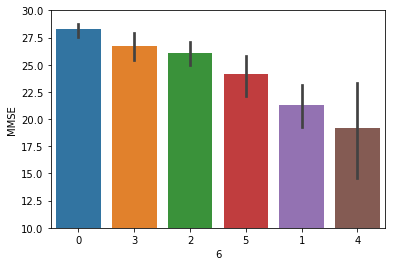

In [210]:
sns.barplot(x=6, y='MMSE', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4]
           )
plt.ylim(10,30)

In [218]:
print(pairwise_tukeyhsd(AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.MMSE)]['MMSE'],
                 AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.MMSE)][6])
     )
     

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  0      1    -6.9361  -9.3381  -4.5342  True 
  0      2    -2.2063  -4.3573  -0.0553  True 
  0      3    -1.5076  -4.0462   1.031  False 
  0      4    -9.1147  -13.3481 -4.8813  True 
  0      5    -4.0811  -6.9777  -1.1845  True 
  1      2     4.7299   2.0919   7.3678  True 
  1      3     5.4286   2.466    8.3911  True 
  1      4    -2.1786   -6.679   2.3219 False 
  1      5     2.855   -0.4195   6.1296 False 
  2      3     0.6987  -2.0643   3.4617 False 
  2      4    -6.9084  -11.2801 -2.5368  True 
  2      5    -1.8748   -4.97    1.2204 False 
  3      4    -7.6071  -12.182  -3.0323  True 
  3      5    -2.5735  -5.9496   0.8025 False 
  4      5     5.0336   0.2508   9.8164  True 
----------------------------------------------


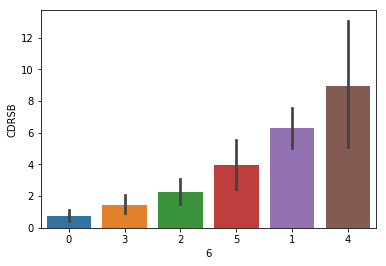

In [222]:
sns.barplot(x=6, y='CDRSB', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4])

In [223]:
print(pairwise_tukeyhsd(AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.CDRSB)]['CDRSB'],
                 AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.CDRSB)][6])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1     5.5103   3.7959  7.2246  True 
  0      2     1.5187  -0.0291  3.0666 False 
  0      3     0.6989  -1.1416  2.5395 False 
  0      4     8.1799   5.3343 11.0256  True 
  0      5     3.213    1.1456  5.2804  True 
  1      2    -3.9915  -5.8847 -2.0984  True 
  1      3    -4.8113  -6.9504 -2.6723  True 
  1      4     2.6696  -0.3776  5.7169 False 
  1      5    -2.2973  -4.6344  0.0399 False 
  2      3    -0.8198  -2.8279  1.1883 False 
  2      4     6.6612   3.7044  9.618   True 
  2      5     1.6943  -0.5237  3.9122 False 
  3      4     7.481    4.361   10.601  True 
  3      5     2.5141   0.0828  4.9453  True 
  4      5    -4.9669  -8.2259 -1.7079  True 
---------------------------------------------


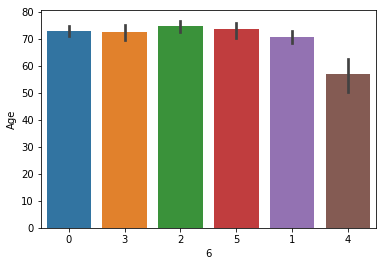

In [224]:
sns.barplot(x=6, y='Age', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4])

In [225]:
print(pairwise_tukeyhsd(AmP_cluster_labels['Age'],
                 AmP_cluster_labels[6])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
  0      1    -2.3021  -6.7894   2.1853 False 
  0      2     1.5829  -2.4312   5.597  False 
  0      3    -0.5818  -5.3267   4.163  False 
  0      4    -16.0985 -23.568   -8.629  True 
  0      5     0.4441  -4.9748   5.8631 False 
  1      2     3.885   -1.0651   8.8351 False 
  1      3     1.7202  -3.8389   7.2793 False 
  1      4    -13.7964 -21.8079 -5.7849  True 
  1      5     2.7462  -3.3983   8.8908 False 
  2      3    -2.1647  -7.3494   3.0199 False 
  2      4    -17.6814 -25.4378  -9.925  True 
  2      5    -1.1388  -6.9467   4.6692 False 
  3      4    -15.5167 -23.6752 -7.3581  True 
  3      5     1.026   -5.3091   7.361  False 
  4      5    16.5426   7.9745  25.1108  True 
----------------------------------------------


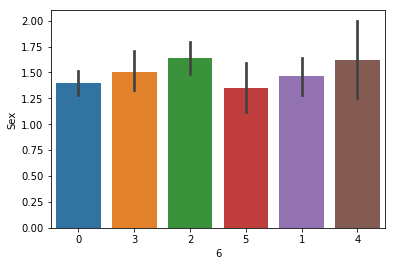

In [227]:
sns.barplot(x=6, y='Sex', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4])

In [228]:
print(pairwise_tukeyhsd(AmP_cluster_labels['Sex'],
                 AmP_cluster_labels[6])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0672  -0.2543 0.3888 False 
  0      2     0.244   -0.0437 0.5316 False 
  0      3     0.1029  -0.2371 0.4429 False 
  0      4     0.2279  -0.3073 0.7632 False 
  0      5    -0.0441  -0.4324 0.3442 False 
  1      2     0.1767   -0.178 0.5314 False 
  1      3     0.0357  -0.3626 0.4341 False 
  1      4     0.1607  -0.4134 0.7348 False 
  1      5    -0.1113  -0.5516 0.3289 False 
  2      3     -0.141  -0.5125 0.2305 False 
  2      4     -0.016  -0.5718 0.5398 False 
  2      5    -0.2881  -0.7043 0.1281 False 
  3      4     0.125   -0.4596 0.7096 False 
  3      5    -0.1471   -0.601 0.3069 False 
  4      5    -0.2721   -0.886 0.3419 False 
--------------------------------------------


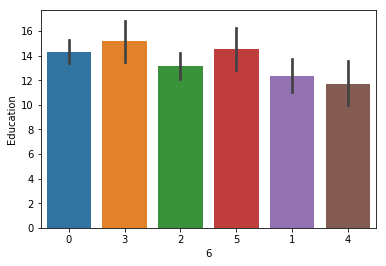

In [229]:
sns.barplot(x=6, y='Education', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4])

In [230]:
print(pairwise_tukeyhsd(AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.Education)]['Education'],
                 AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.Education)][6])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -1.9517  -4.3996 0.4962 False 
  0      2    -1.1806  -3.3704 1.0092 False 
  0      3     0.8578  -1.7305 3.4462 False 
  0      4    -2.5945  -6.9219 1.7328 False 
  0      5     0.1912   -2.765 3.1473 False 
  1      2     0.7711  -1.9293 3.4714 False 
  1      3     2.8095   -0.223 5.8421 False 
  1      4    -0.6429  -5.2497 3.9639 False 
  1      5     2.1429  -1.2091 5.4948 False 
  2      3     2.0385  -0.7898 4.8668 False 
  2      4    -1.4139  -5.8889 3.0611 False 
  2      5     1.3718  -1.7965 4.5401 False 
  3      4    -3.4524  -8.1353 1.2306 False 
  3      5    -0.6667  -4.1225 2.7892 False 
  4      5     2.7857  -2.1101 7.6815 False 
--------------------------------------------


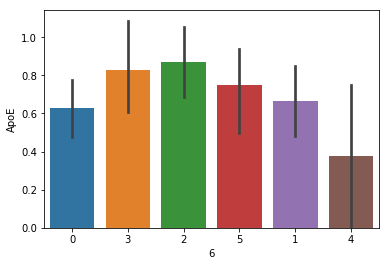

In [232]:
sns.barplot(x=6, y='ApoE', data=AmP_cluster_labels, 
            order=[0,3,2,5,1,4])

In [233]:
print(pairwise_tukeyhsd(AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.ApoE)]['ApoE'],
                 AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.ApoE)][6])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     0.0398  -0.3412 0.4208 False 
  0      2     0.2416  -0.0979 0.581  False 
  0      3     0.1992  -0.2047 0.6032 False 
  0      4    -0.2519  -0.8771 0.3734 False 
  0      5     0.1231   -0.342 0.5882 False 
  1      2     0.2018   -0.219 0.6225 False 
  1      3     0.1594  -0.3149 0.6337 False 
  1      4    -0.2917  -0.9645 0.3812 False 
  1      5     0.0833   -0.444 0.6107 False 
  2      3    -0.0423  -0.4839 0.3992 False 
  2      4    -0.4934  -1.1436 0.1568 False 
  2      5    -0.1184  -0.6165 0.3797 False 
  3      4    -0.4511  -1.1372 0.235  False 
  3      5    -0.0761  -0.6202 0.468  False 
  4      5     0.375   -0.3488 1.0988 False 
--------------------------------------------


In [235]:
import statsmodels.api as sm
tab = pandas.crosstab(AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.ApoE)][6],
                      AmP_cluster_labels[pandas.notnull(AmP_cluster_labels.ApoE)]['ApoE'])
tab.loc[:,1] = tab.loc[:,1] + tab.loc[:,2]
tab = tab[[0,1]]
print(tab)
table = sm.stats.Table(tab)
print('p =',table.test_nominal_association().pvalue)

ApoE  0.0  1.0
6             
0      30   37
1      10   17
2       9   29
3       6   17
4       5    3
5       4   12
p = 0.107631046235


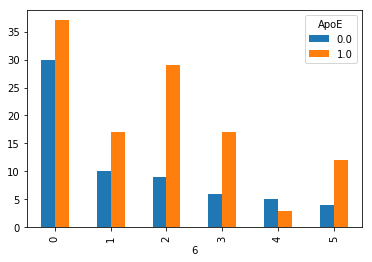

In [236]:
tab.plot.bar()

## Predict

In [238]:
avg_clusters = pandas.DataFrame(index = np.unique(AmP_cluster_labels[6]),
                               columns = fulldf.columns[:-13])
for k in np.unique(AmP_cluster_labels[6]):
    avg_clusters.loc[k] = all_probs.loc[AmP_cluster_labels[AmP_cluster_labels[6]==k].index
                                       ][fulldf.columns[:-13]].mean().values

In [239]:
AmN_predictions = pandas.DataFrame(index = AmN.index, 
                                   columns = np.unique(AmP_cluster_labels[6]))
for sub in AmN.index:
    svec = AmN_probs.loc[sub,avg_clusters.dropna(1).columns]
    for k in avg_clusters.index:
        AmN_predictions.loc[sub, k] = stats.pearsonr(svec.values, avg_clusters.dropna(1).loc[k].values)[0]

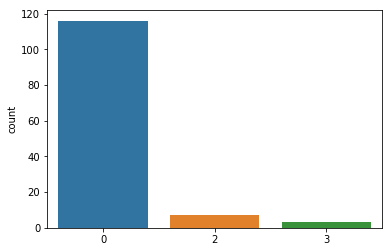

In [240]:
AmN_vote = [np.argmax(AmN_predictions.loc[x].values) for x in AmN_predictions.index]
all_cluster_labels.loc[AmN_predictions.index,'Predicted_AmN_APp_k6'] = AmN_vote
sns.countplot(AmN_vote)

In [242]:
all_cluster_labels.loc[all_cluster_labels[all_cluster_labels.MMSE=='ND'].index,'MMSE'] = np.nan
all_cluster_labels['MMSE'] = all_cluster_labels['MMSE'].astype(float).values
all_cluster_labels['CDRSB'] = all_cluster_labels['CDRSB'].astype(float).values

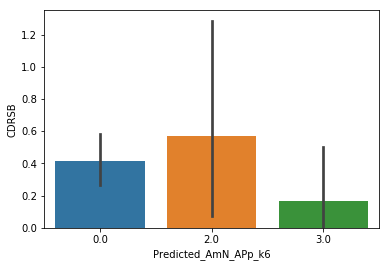

In [243]:
sns.barplot(x = 'Predicted_AmN_APp_k6', y = 'CDRSB', data = all_cluster_labels)

## Higher Resolution

0


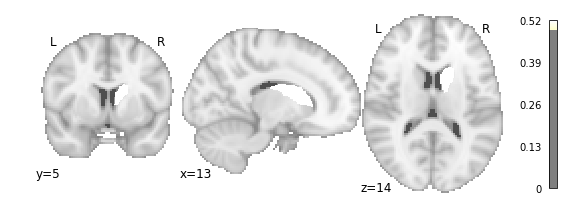

1


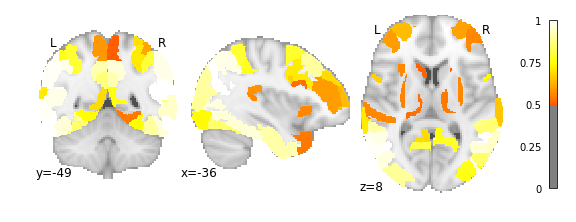

2


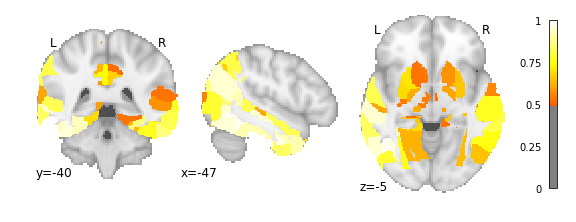

3


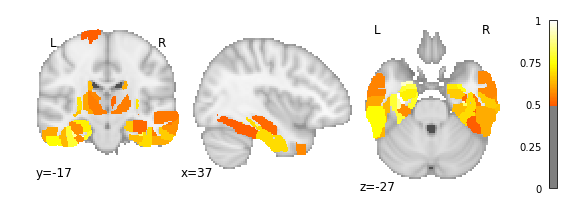

4


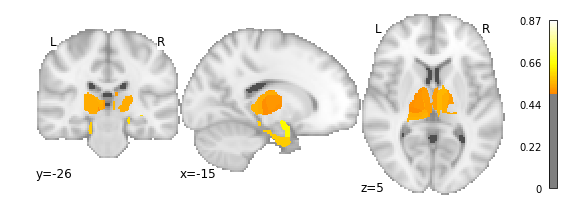

5


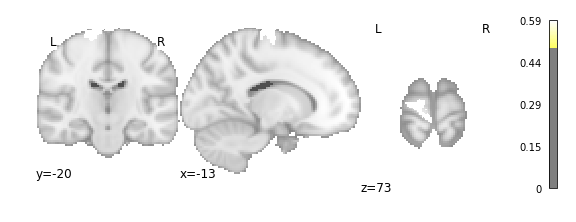

6


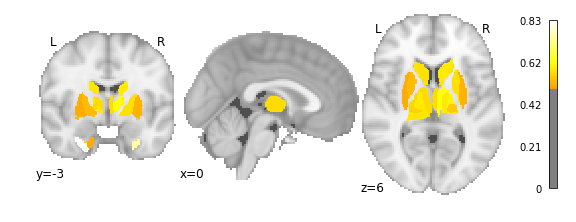

7


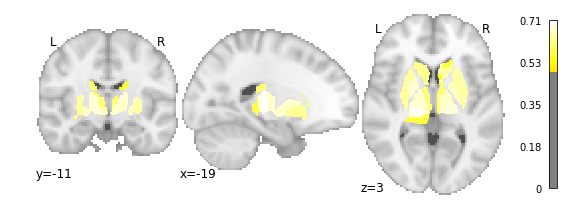

8


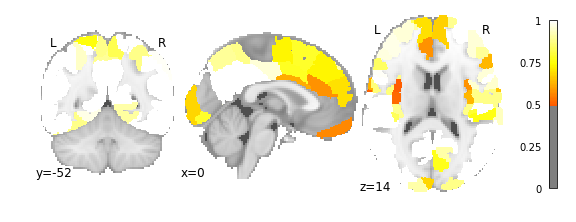

9


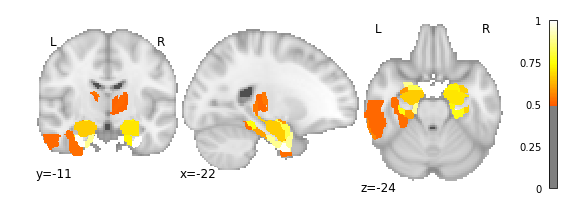

In [260]:
k10s = sorted(glob('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k10_clus*.nii'))
for i,pth in enumerate(k10s):
    print(i)
    plt.close()
    plotting.plot_stat_map(pth, threshold=0.5, draw_cross=False)
    plt.show()

(10, 30.78157894736842)

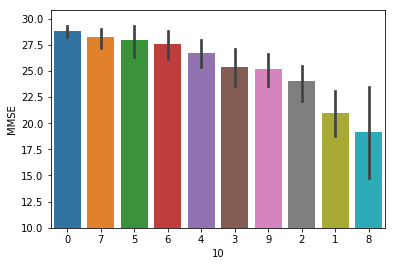

In [252]:
sns.barplot(x=10, y='MMSE', data=AmP_cluster_labels, 
            order=[0,7,5,6,4,3,9,2,1,8]
           )
plt.ylim(10)

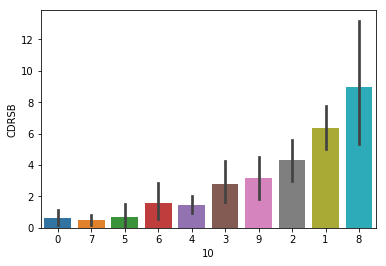

In [261]:
sns.barplot(x=10, y='CDRSB', data=AmP_cluster_labels, 
            order=[0,7,5,6,4,3,9,2,1,8]
           )
#plt.ylim(10,30)

In [267]:
k13s

['/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus0.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus1.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus10.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus11.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus12.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus2.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus3.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus4.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus5.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus6.nii',
 '/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus7.nii',
 '/home/users/jvog

0


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


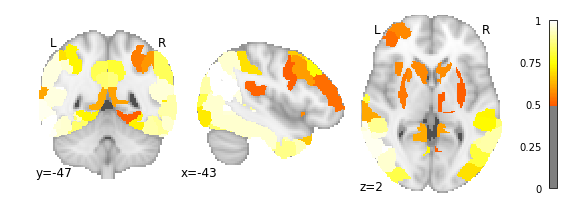

1


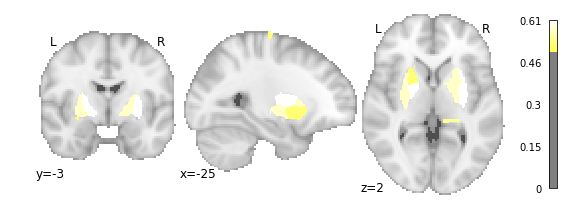

2


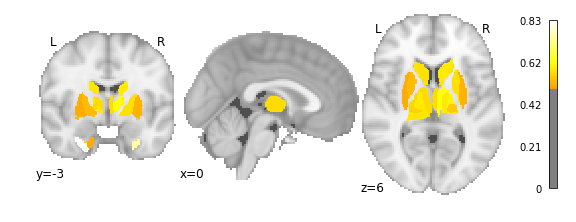

3


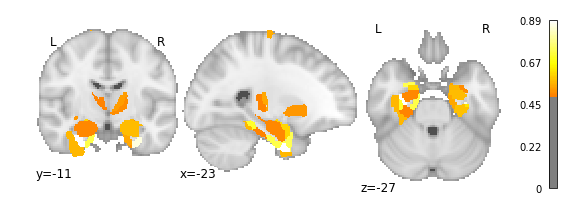

4


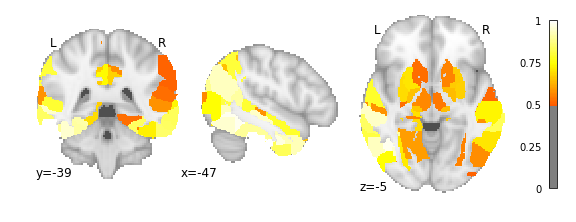

5


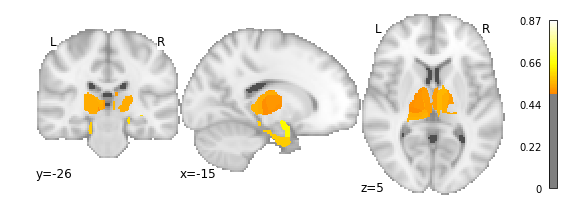

6


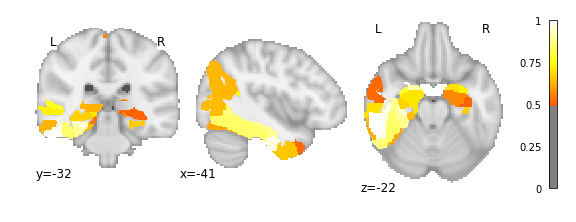

7


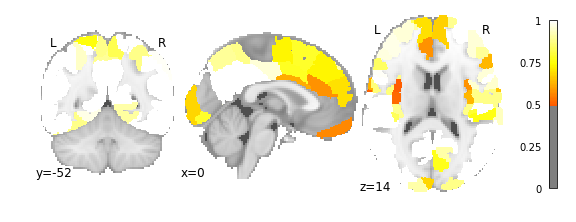

8


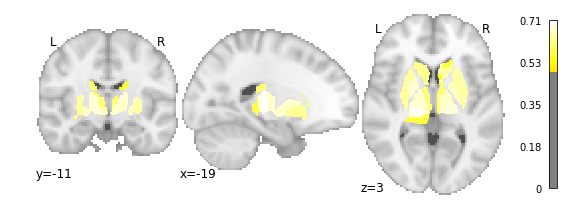

9


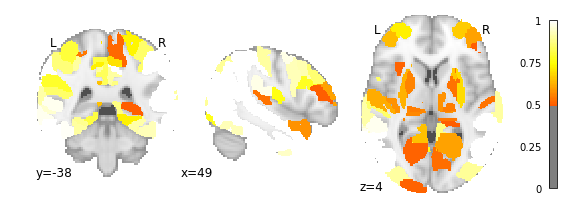

10


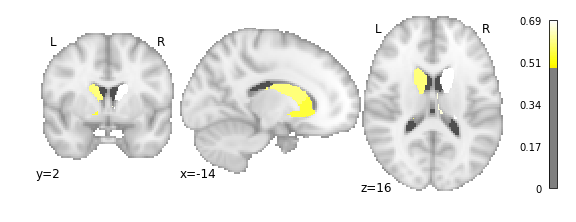

11


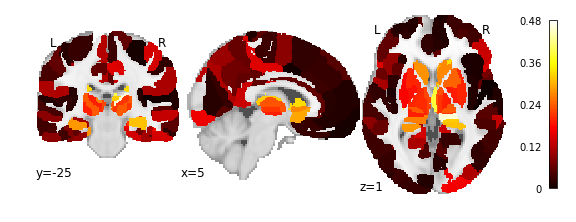

12


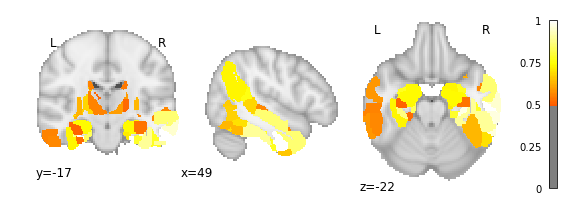

In [268]:
k13s = sorted(glob('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/AmP_i500_image_k13_clus*.nii'))
for i,pth in enumerate(k13s):
    pth = [x for x in k13s if 'clus%s.'%i in x][0]
    print(i)
    plt.close()
    img = ni.load(pth)
    if len(img.get_data()[img.get_data()>0.5]) == 0:
        plotting.plot_stat_map(img, draw_cross=False)
    else:
        plotting.plot_stat_map(img, threshold=0.5, draw_cross=False)
    plt.show()

(10, 31.5)

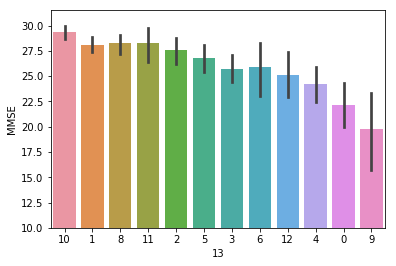

In [248]:
sns.barplot(x=13, y='MMSE', data=AmP_cluster_labels, 
            order=[10,1,8,11,2,5,3,6,12,4,0,9]
           )
plt.ylim(10)

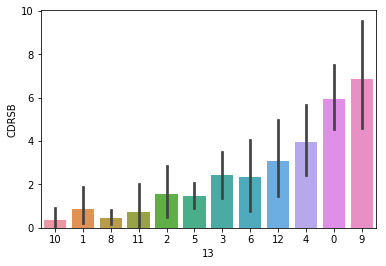

In [253]:
sns.barplot(x=13, y='CDRSB', data=AmP_cluster_labels, 
            order=[10,1,8,11,2,5,3,6,12,4,0,9]
           )
#plt.ylim(10,30)

CHARACTERIZE AND PREDICT!

In [182]:
print(pairwise_tukeyhsd(amp_labs[pandas.notnull(amp_labs.MMSE)]['MMSE'],
                 amp_labs[pandas.notnull(amp_labs.MMSE)]['AmP_p_13'])
     )

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 0.0    1.0    2.475   -1.9731   6.9231 False 
 0.0    2.0    0.875   -3.5007   5.2507 False 
 0.0    3.0    3.125   -0.6645   6.9145 False 
 0.0    4.0    4.275   -0.7141   9.2641 False 
 0.0    5.0    1.625   -2.3695   5.6195 False 
 0.0    6.0   -2.9583  -7.2108   1.2941 False 
 0.0    7.0   -5.0341  -9.8816  -0.1866  True 
 0.0    8.0    3.125   -3.7936  10.0436 False 
 0.0    9.0   -0.9485  -5.2594   3.3624 False 
 0.0    10.0   -6.625  -12.5498 -0.7002  True 
 0.0    11.0   3.1607  -2.4478   8.7693 False 
 0.0    12.0   2.875    -3.466   9.216  False 
 1.0    2.0     -1.6   -6.0481   2.8481 False 
 1.0    3.0     0.65   -3.2228   4.5228 False 
 1.0    4.0     1.8    -3.2527   6.8527 False 
 1.0    5.0    -0.85   -4.9236   3.2236 False 
 1.0    6.0   -5.4333  -9.7602  -1.1065  True 
 1.0    7.0   -7.5091  -12.422  -2.5962  True 
 1.0    8

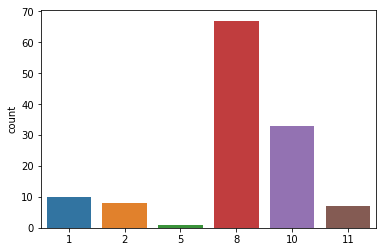

In [270]:
avg_clusters = pandas.DataFrame(index = np.unique(AmP_cluster_labels[13]),
                               columns = fulldf.columns[:-13])
for k in np.unique(AmP_cluster_labels[13]):
    avg_clusters.loc[k] = all_probs.loc[AmP_cluster_labels[AmP_cluster_labels[13]==k].index
                                       ][fulldf.columns[:-13]].mean().values

AmN_predictions = pandas.DataFrame(index = AmN.index, 
                                   columns = np.unique(AmP_cluster_labels[13]))
for sub in AmN.index:
    svec = AmN_probs.loc[sub,avg_clusters.dropna(1).columns]
    for k in avg_clusters.index:
        AmN_predictions.loc[sub, k] = stats.pearsonr(svec.values, avg_clusters.dropna(1).loc[k].values)[0]

AmN_vote = [np.argmax(AmN_predictions.loc[x].values) for x in AmN_predictions.index]
all_cluster_labels.loc[AmN_predictions.index,'Predicted_AmN_APp_k13'] = AmN_vote
sns.countplot(AmN_vote)

In [284]:
sns.barplot?

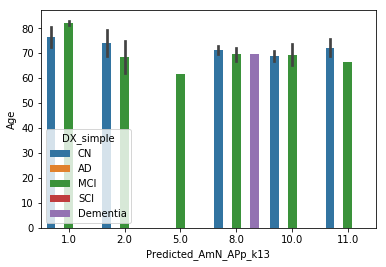

In [288]:
sns.barplot(x = 'Predicted_AmN_APp_k13', y = 'Age', hue = 'DX_simple', data = all_cluster_labels)

# ONLY TAU ROIS

In [291]:
tau_rois = all_report[all_report.model=='2comp'].index

In [292]:
all_tau_probs = pandas.DataFrame(all_probs[tau_rois], copy=True)

In [294]:
AmP_tau_probs = pandas.DataFrame(AmP_probs[tau_rois], copy=True)
AmN_tau_probs = pandas.DataFrame(AmN_probs[tau_rois], copy=True)

In [297]:
in_AmP_tau_p = AmP_tau_probs.dropna(1)
cx_AmP_tau_p = pandas.DataFrame(np.corrcoef(in_AmP_tau_p))

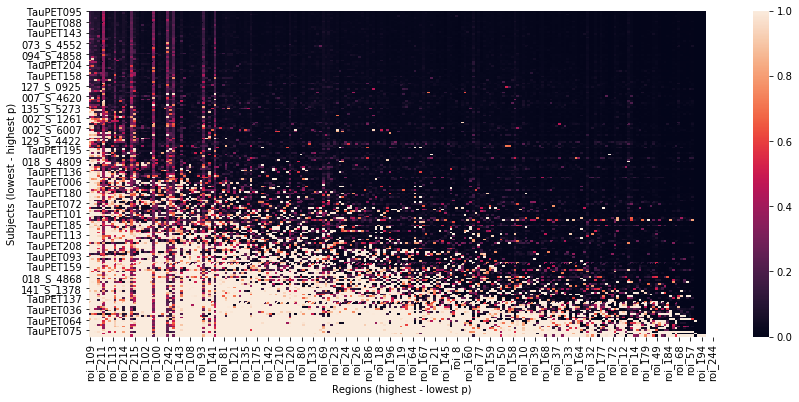

Index(['roi_109', 'roi_110', 'roi_117', 'roi_115', 'roi_211', 'roi_59',
       'roi_212', 'roi_118', 'roi_113', 'roi_216',
       ...
       'roi_58', 'roi_57', 'roi_67', 'roi_41', 'roi_65', 'roi_194', 'roi_191',
       'roi_237', 'roi_243', 'roi_244'],
      dtype='object', length=225)

In [299]:
esm.Plot_Probabilites(AmP_tau_probs)

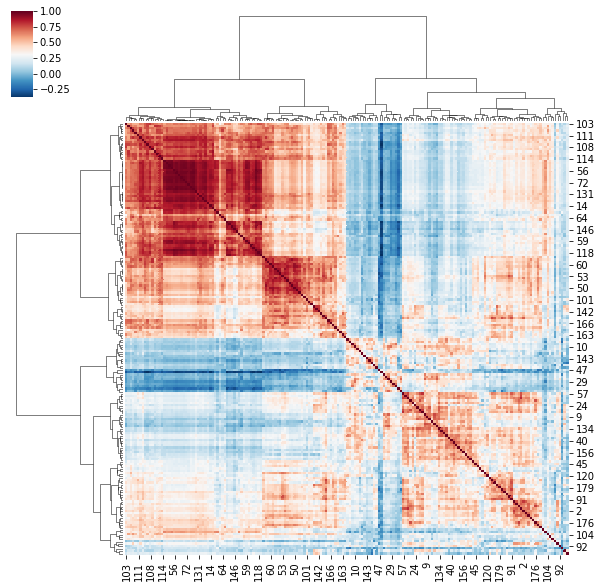

In [298]:
sns.clustermap(cx_AmP_tau_p, method='ward', cmap='RdBu_r')

In [301]:
rois

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

>>>>>>> k = 2 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


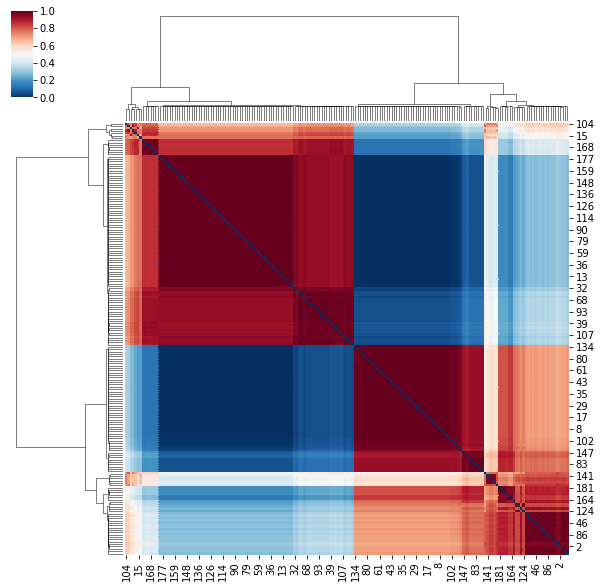

working on cluster 0
working on cluster 1
>>>>>>> k = 3 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


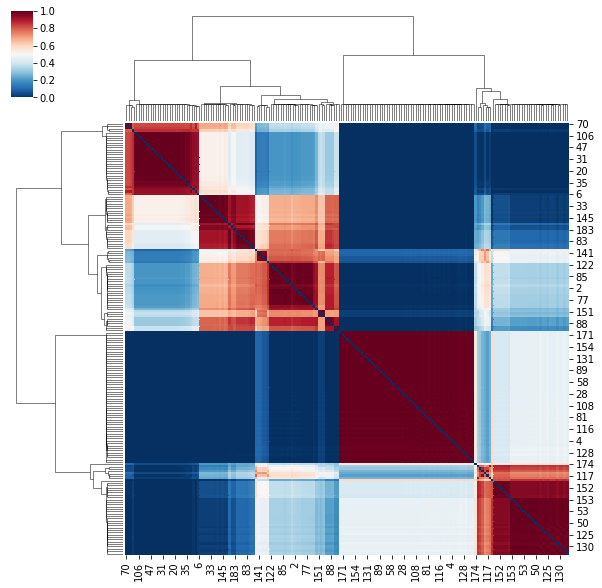

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


working on cluster 0
working on cluster 1
working on cluster 2
>>>>>>> k = 4 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


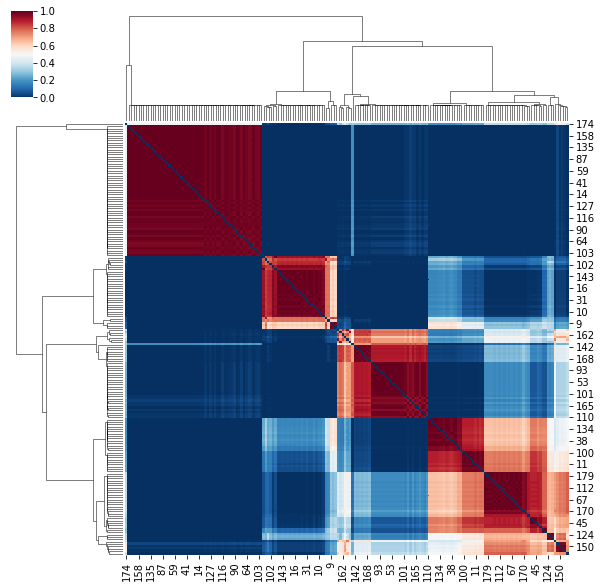

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
>>>>>>> k = 5 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


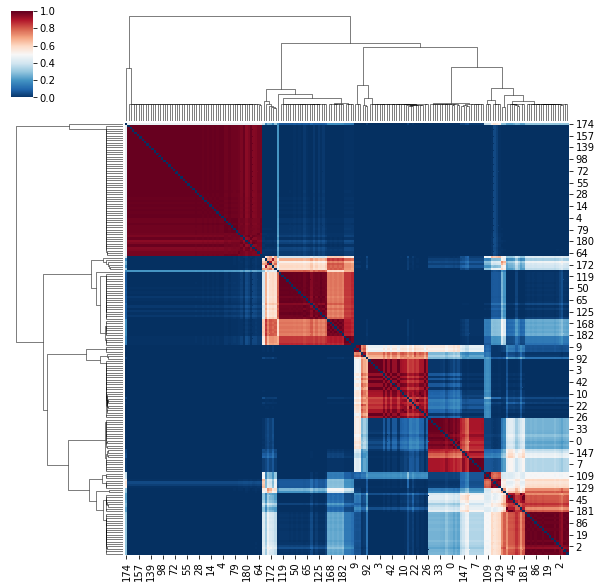

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
>>>>>>> k = 6 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


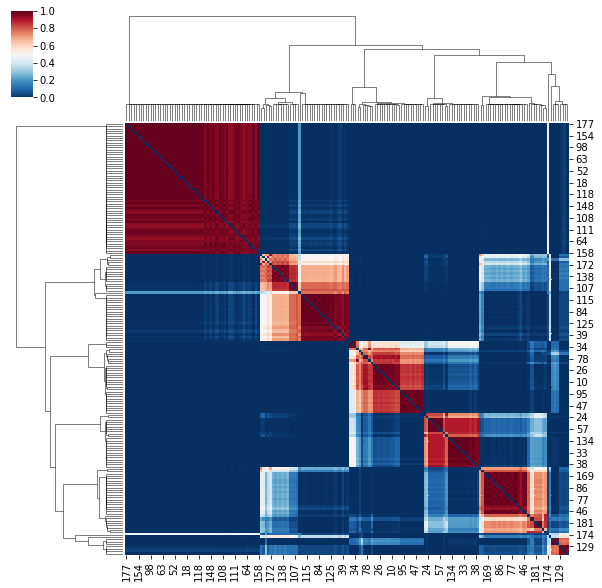

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
>>>>>>> k = 7 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


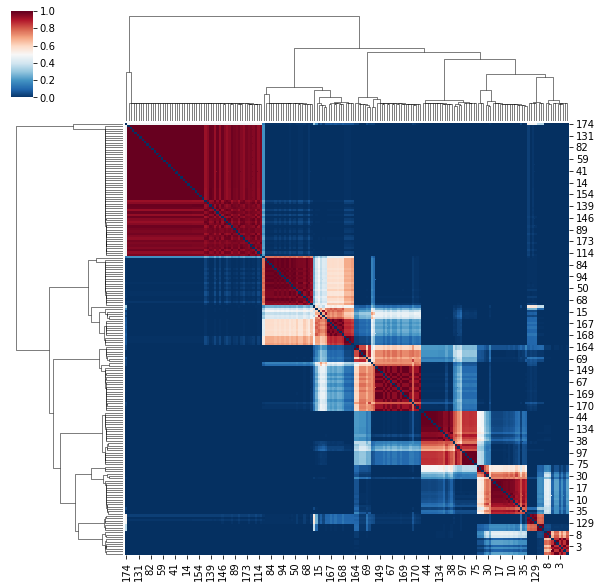

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
>>>>>>> k = 8 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


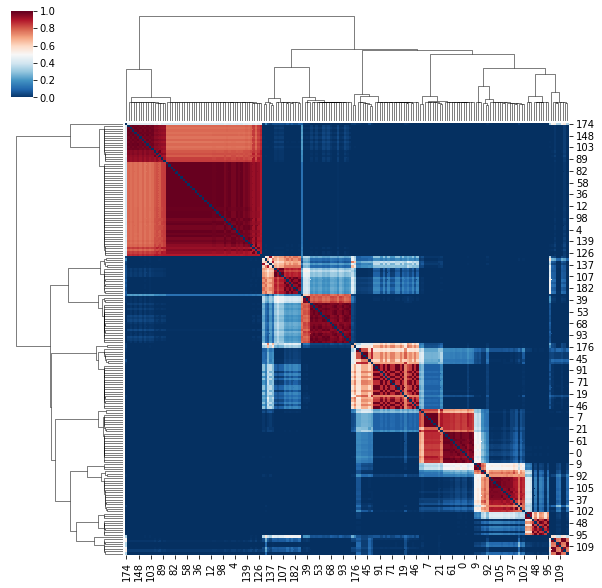

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
>>>>>>> k = 9 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


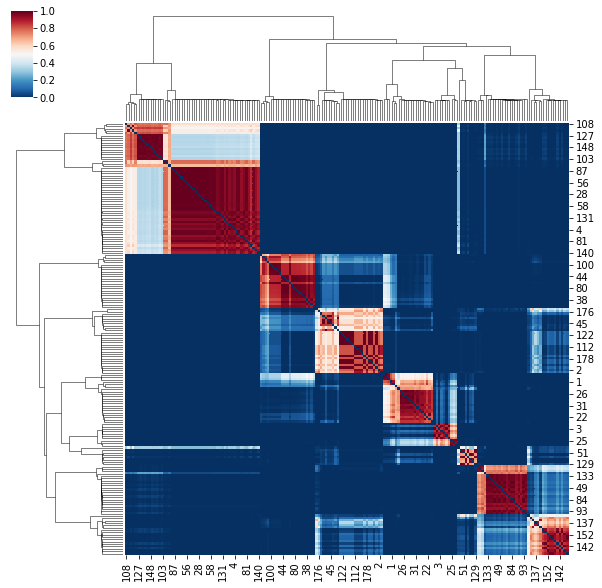

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
>>>>>>> k = 10 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


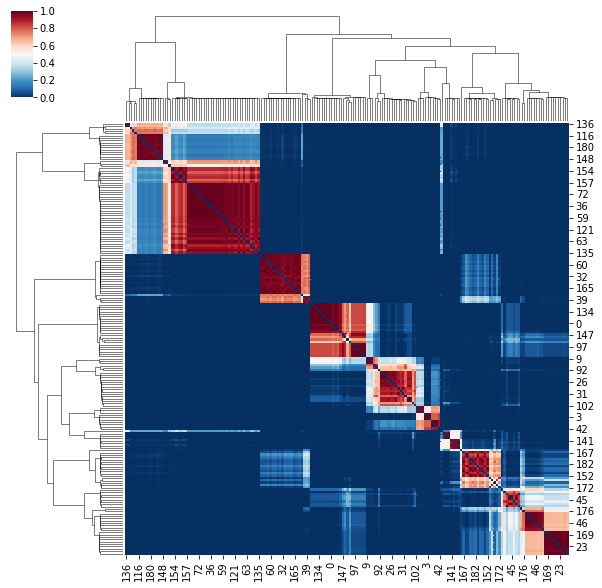

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
>>>>>>> k = 11 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


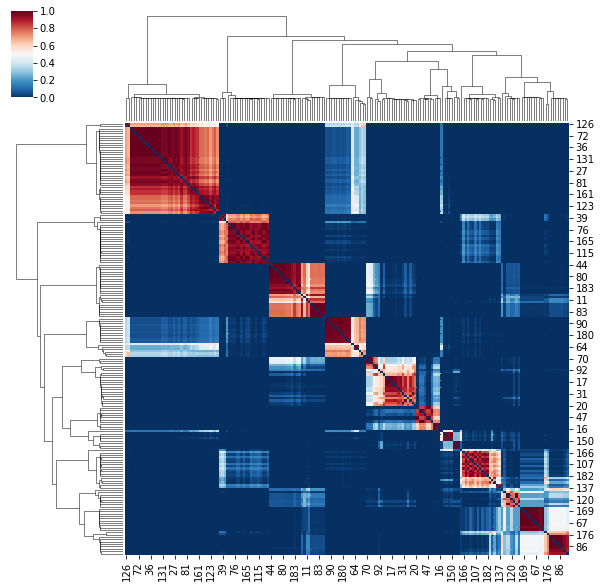

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
>>>>>>> k = 12 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


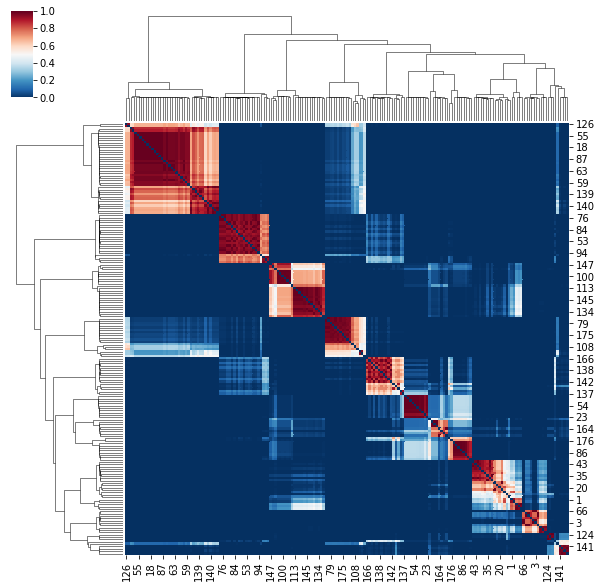

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
>>>>>>> k = 13 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


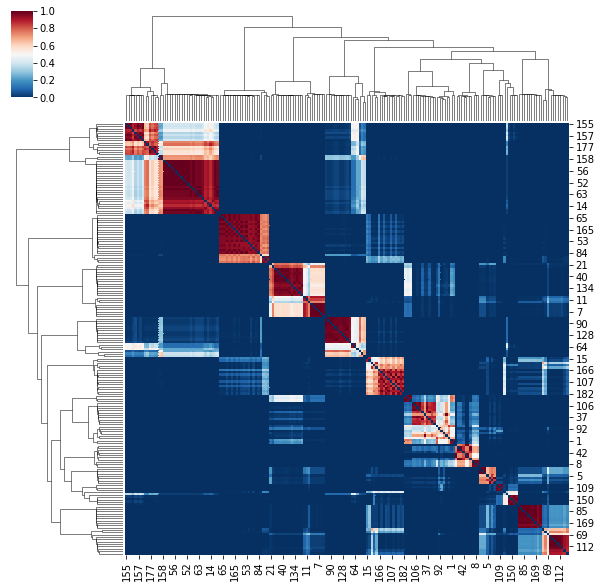

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
>>>>>>> k = 14 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


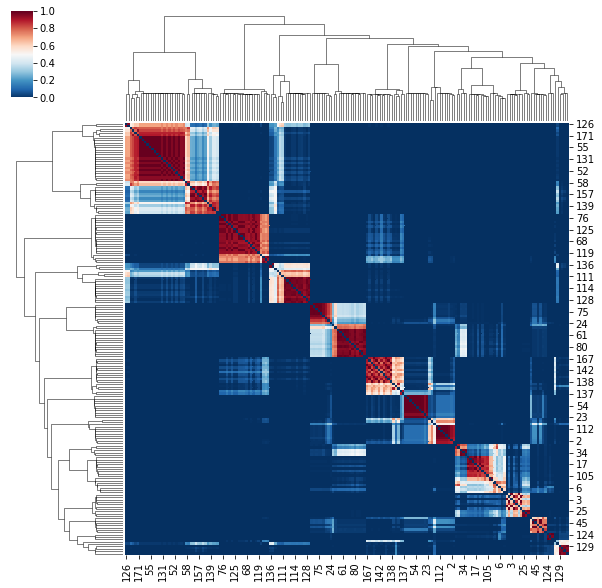

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
>>>>>>> k = 15 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


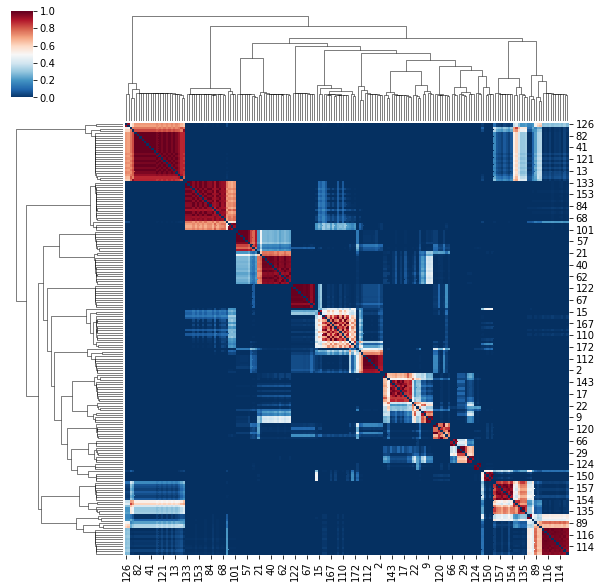

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
>>>>>>> k = 16 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


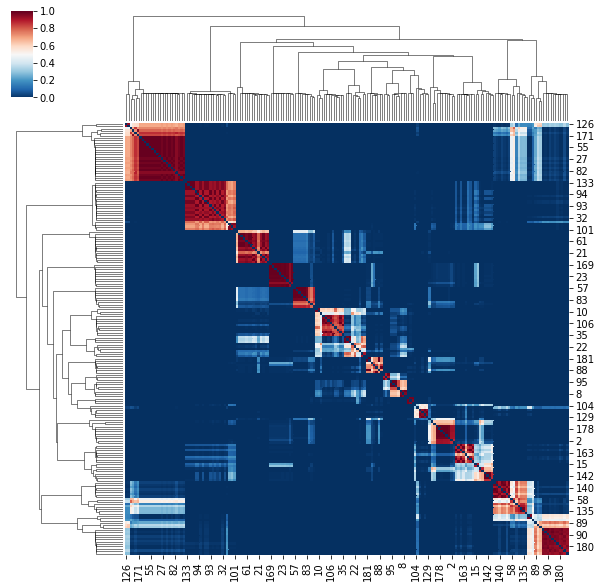

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
>>>>>>> k = 17 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


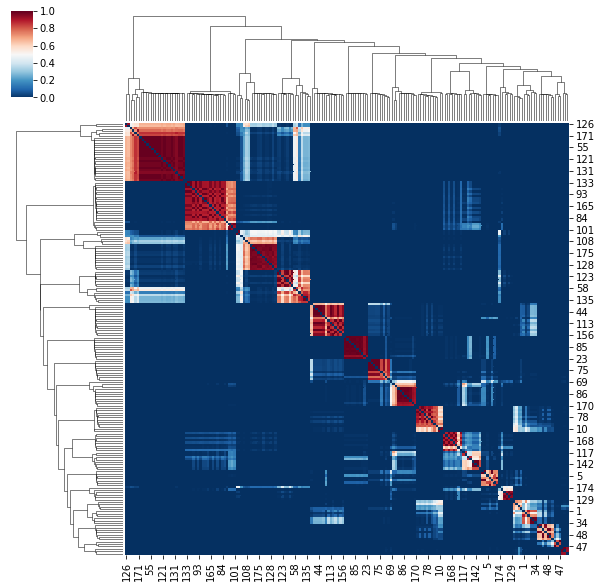

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
>>>>>>> k = 18 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


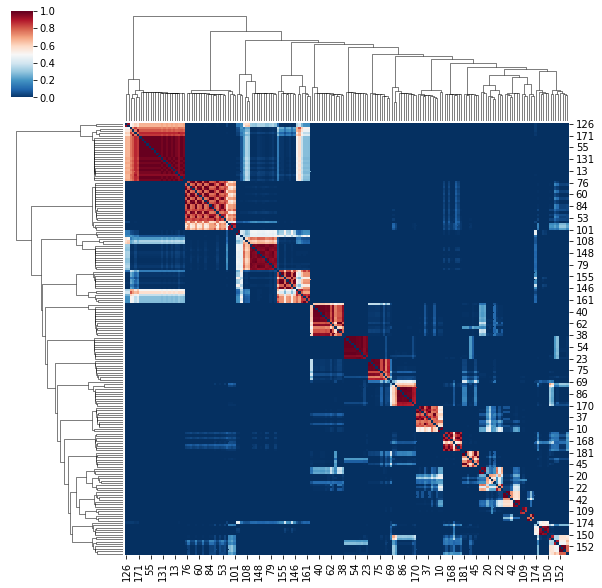

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
>>>>>>> k = 19 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


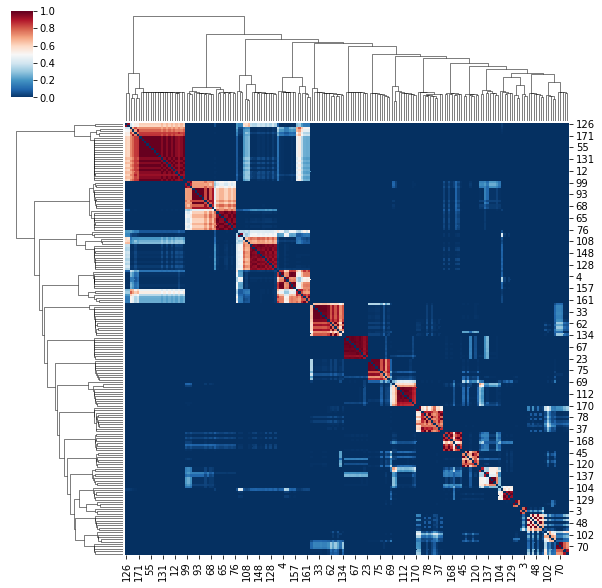

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
working on cluster 18
>>>>>>> k = 20 <<<<<<<
running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400


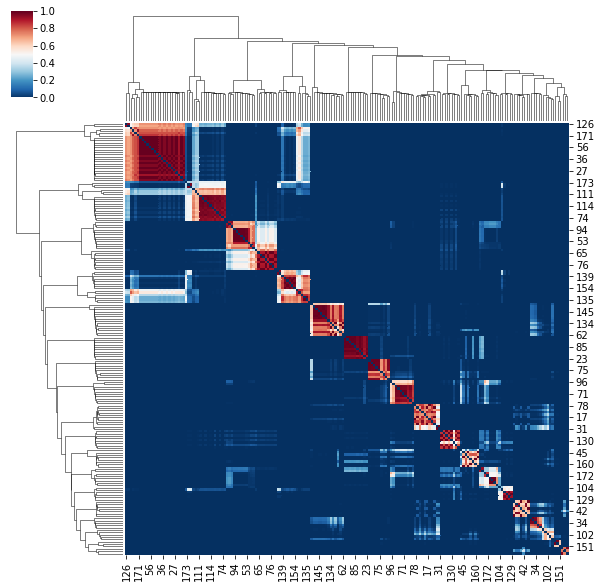

working on cluster 0
working on cluster 1
working on cluster 2
working on cluster 3
working on cluster 4
working on cluster 5
working on cluster 6
working on cluster 7
working on cluster 8
working on cluster 9
working on cluster 10
working on cluster 11
working on cluster 12
working on cluster 13
working on cluster 14
working on cluster 15
working on cluster 16
working on cluster 17
working on cluster 18
working on cluster 19


In [306]:
ks = range(2,21)
basc_results = pandas.DataFrame(index = ks, columns = ['k','silhouette', 'CH_index',
                                                            'mean_size','min_size','max_size'])
AmP_cluster_labels = pandas.DataFrame(index = AmP.index, columns = ks)
rois_tau = [int(x.split('_')[-1]) for x in AmP_tau_probs.columns]
for k in ks:
    print('>>>>>>> k = %s <<<<<<<'%k)
    ### cluster
    output = poormans_basc(cx_AmP_tau_p, k, 500, 100, True, None, True, 30, plotit=True)
    ### run stats
    # scores
    basc_results.loc[k,'CH_index'] = calinski_harabaz_score(output['stability'],
                                                              output['labels'])
    basc_results.loc[k,'silhouette'] = silhouette_score(output['stability'],
                                                      output['labels'])
    # sizes
    sizes = [len(output['labels'][output['labels']==x]) for x in np.unique(output['labels'])]
    basc_results.loc[k,'mean_size'] = np.mean(sizes)
    basc_results.loc[k,'min_size'] = np.min(sizes)
    basc_results.loc[k,'max_size'] = np.max(sizes)
    
    ### save labels
    AmP_cluster_labels.loc[:,k] = output['labels']
    AmP_cluster_labels.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/TAUAmP_i500_labels.csv')
    
    ### save matrices
    stab = pandas.DataFrame(output['stability'], index = AmP.index, columns = AmP.index)
    stab.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/TAUAmP_i500_stability_%s.csv'%k)
    
    ### save images
    clust_imgs = visualize_clusters(AmP_tau_probs, rois_tau, output['labels'], atl_pth, False)
    for ik, img in clust_imgs.items():
        img.to_filename('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/TAUAmP_i500_image_k%s_clus%s'%(k,ik))

basc_results.to_csv('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/TAUAmP_i500_clustering_stats.csv')

In [303]:
.columns

Index(['roi_1', 'roi_2', 'roi_3', 'roi_4', 'roi_5', 'roi_6', 'roi_7', 'roi_8',
       'roi_9', 'roi_10',
       ...
       'roi_216', 'roi_217', 'roi_218', 'roi_223', 'roi_224', 'roi_237',
       'roi_240', 'roi_242', 'roi_243', 'roi_244'],
      dtype='object', length=225)

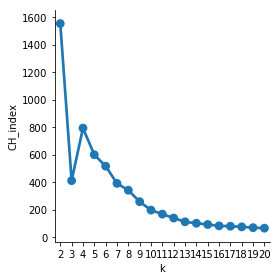

In [309]:
basc_results.loc[:,'k'] = ks
sns.factorplot(x='k', y = 'CH_index', data = basc_results)

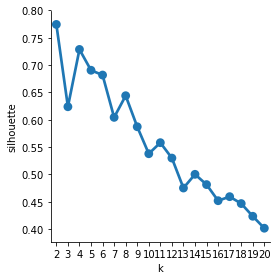

In [310]:
basc_results.loc[:,'k'] = ks
sns.factorplot(x='k', y = 'silhouette', data = basc_results)

>>>>>2<<<<<
0
n = 89


/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


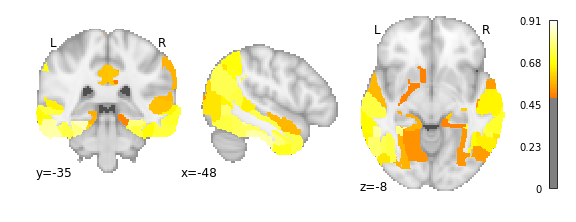

1
n = 95


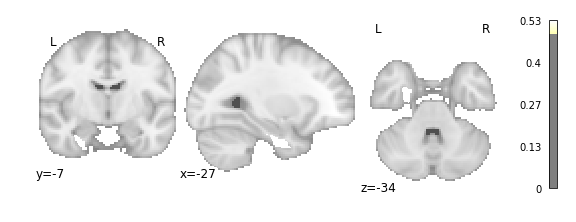

>>>>>4<<<<<
0
n = 58


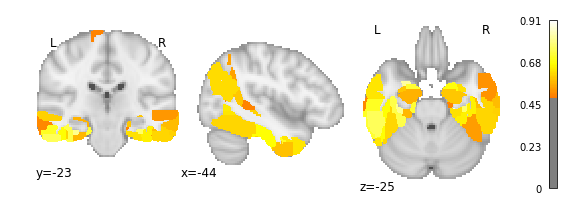

1
n = 31


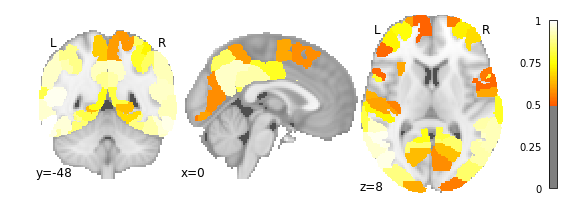

2
n = 39


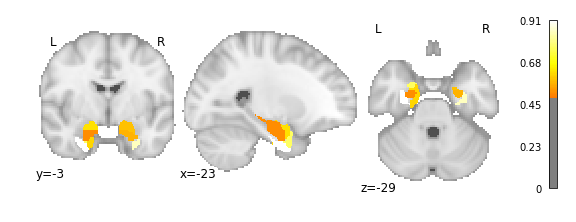

3
n = 56


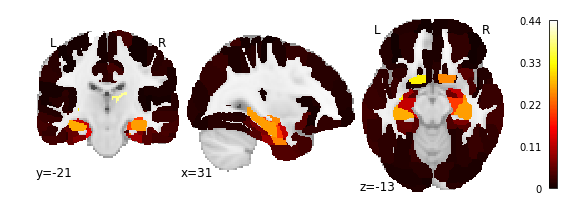

>>>>>6<<<<<
0
n = 38


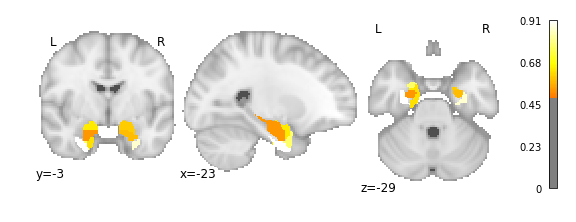

1
n = 28


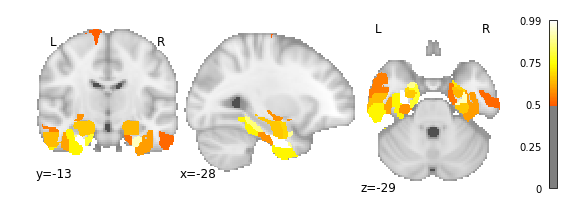

2
n = 31


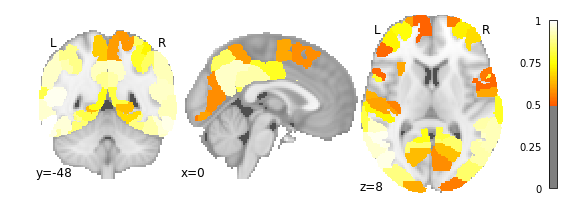

3
n = 56


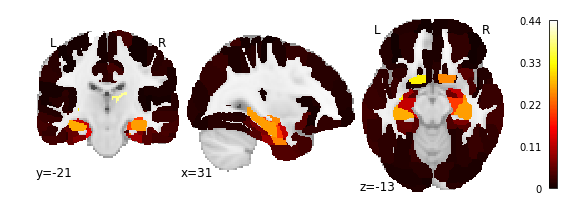

4
n = 23


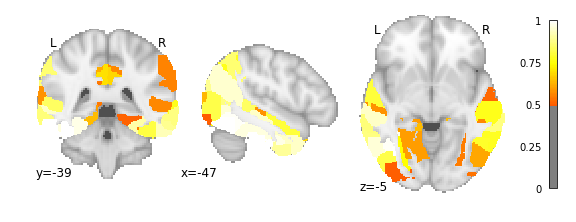

5
n = 8


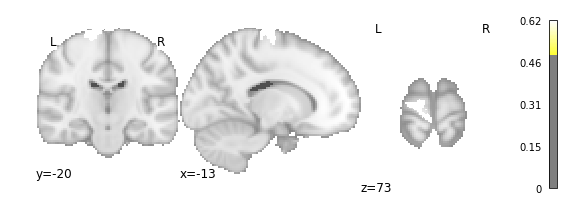

>>>>>8<<<<<
0
n = 21


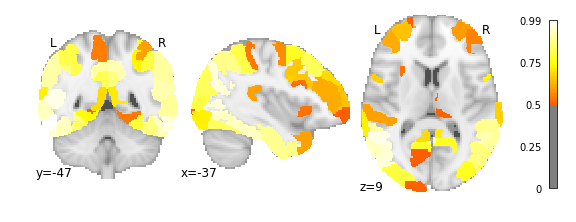

1
n = 56


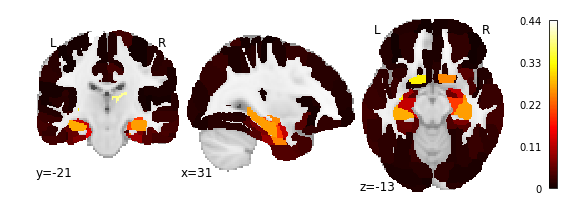

2
n = 8


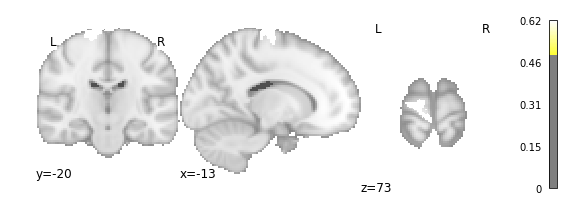

3
n = 28


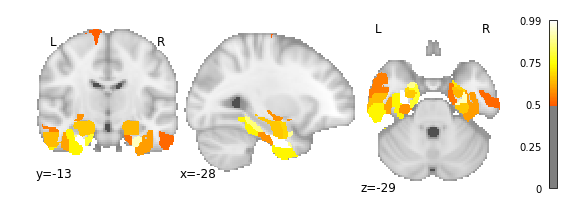

4
n = 23


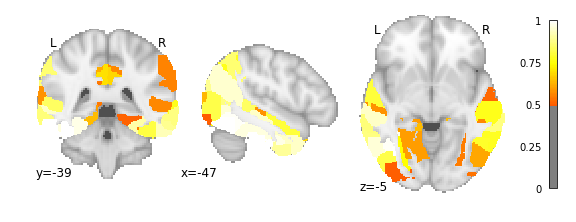

5
n = 21


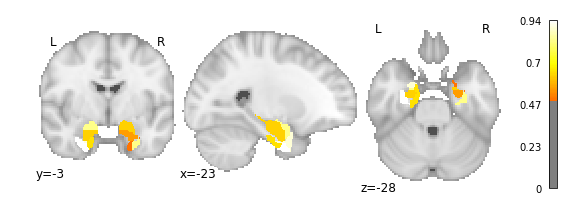

6
n = 17


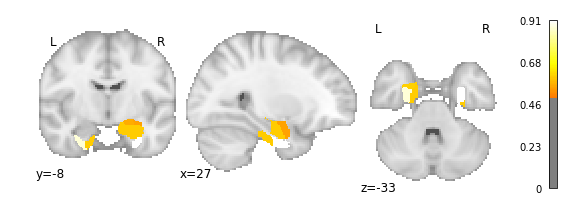

7
n = 10


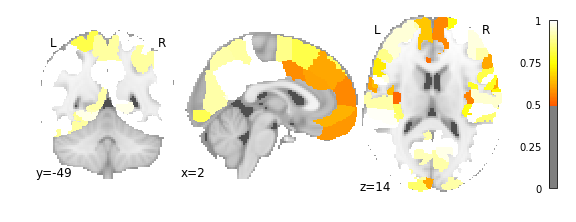

>>>>>11<<<<<
0
n = 21


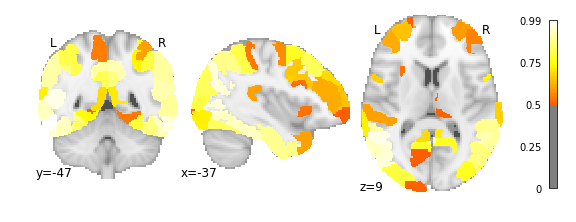

1
n = 39


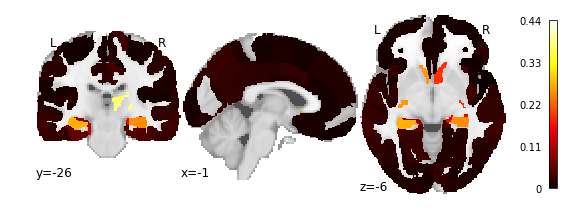

2
n = 17


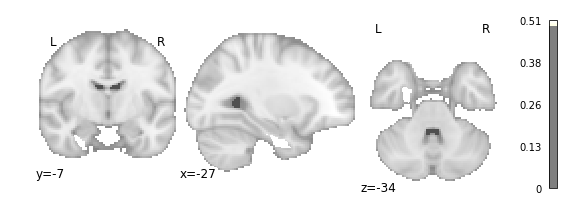

3
n = 21


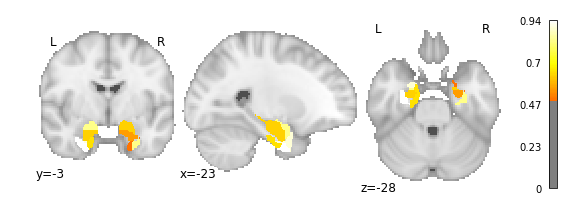

4
n = 10


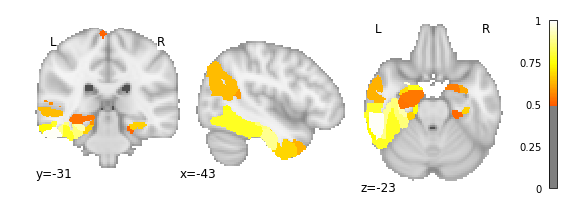

5
n = 23


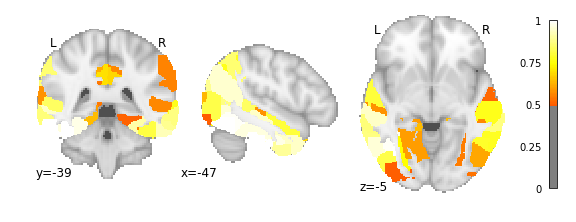

6
n = 17


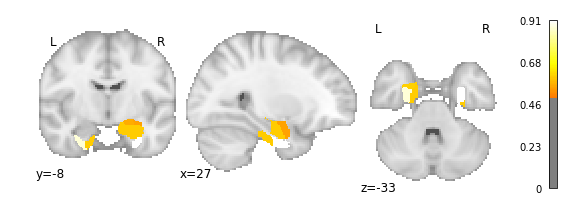

7
n = 8


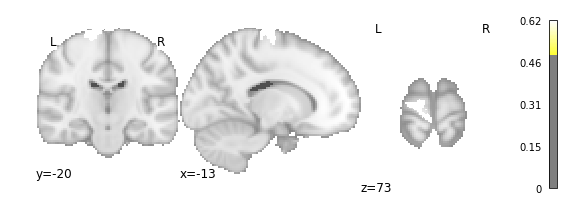

8
n = 10


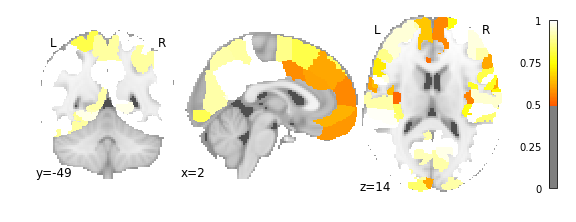

9
n = 8


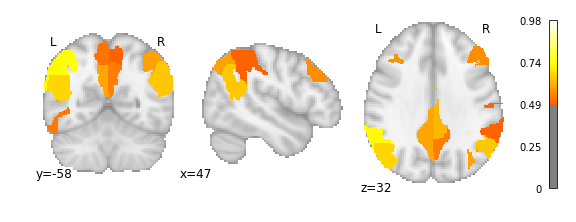

10
n = 10


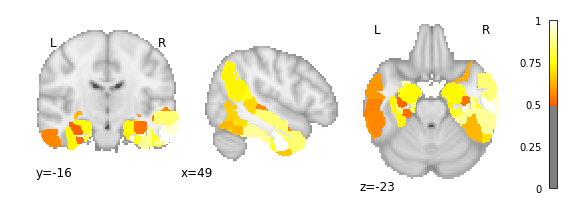

>>>>>14<<<<<
0
n = 17


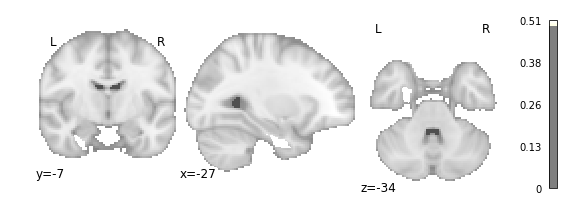

1
n = 16


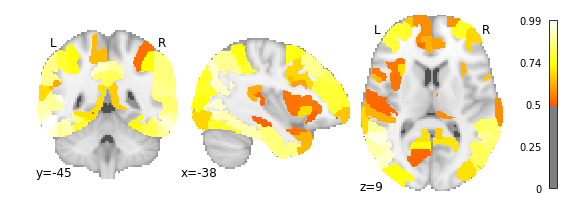

2
n = 25


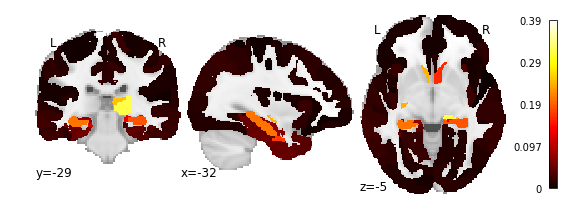

3
n = 14


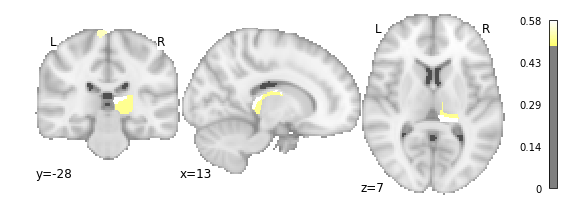

4
n = 8


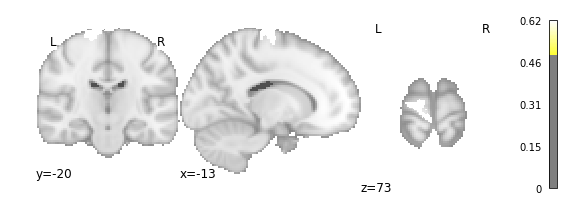

5
n = 21


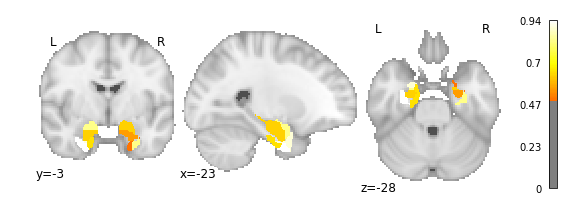

6
n = 17


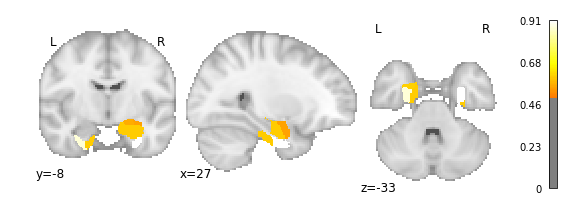

7
n = 14


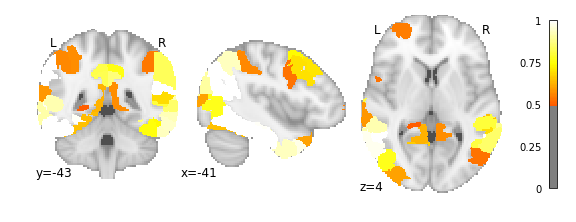

8
n = 10


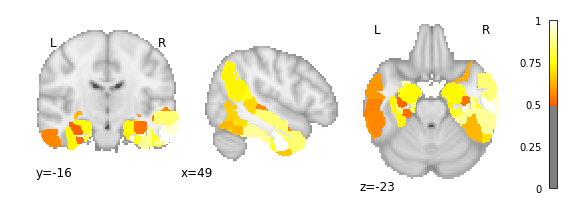

9
n = 11


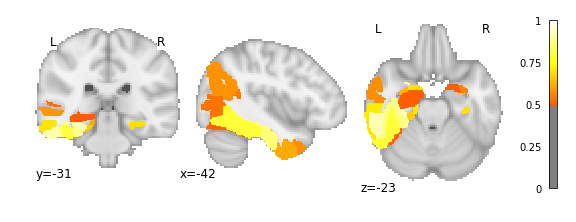

10
n = 9


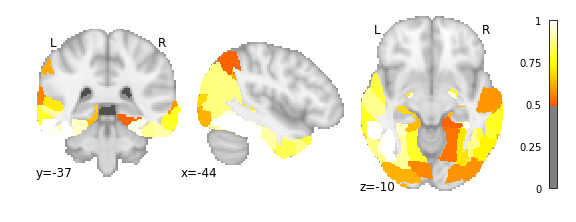

11
n = 10


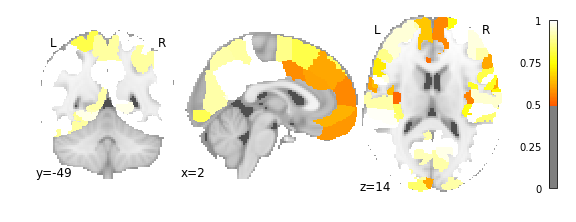

12
n = 5


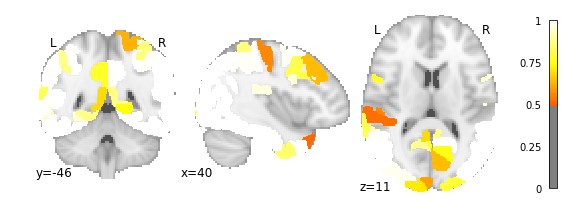

13
n = 7


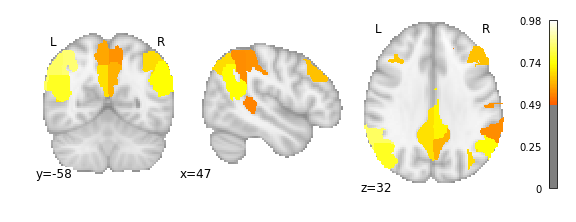

In [316]:
targs = [2,4,6,8,11,14]
for t in targs:
    print('>>>>>%s<<<<<'%t)
    ki = sorted(glob('/home/users/jvogel/Science/ADNI_tau/clustering/Chapter3/TAUAmP_i500_image_k%s_clus*.nii'%t))
    for i,pth in enumerate(ki):
        pth = [x for x in ki if 'clus%s.'%i in x][0]
        print(i)
        n = len(AmP_cluster_labels[AmP_cluster_labels[t]==i])
        print('n = %s'%n)
        plt.close()
        img = ni.load(pth)
        if len(img.get_data()[img.get_data()>0.5]) == 0:
            plotting.plot_stat_map(img, draw_cross=False)
        else:
            plotting.plot_stat_map(img, threshold=0.5, draw_cross=False)
        plt.show()

(10, 30)

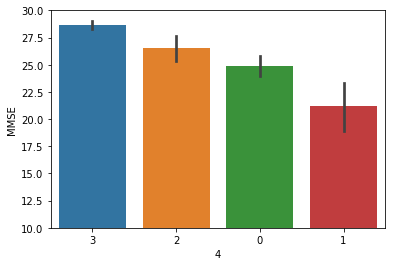

In [320]:
sns.barplot(x=4, y='MMSE', data=AmP_cluster_labels, 
            order=[3,2,0,1]
           )
plt.ylim(10,30)

(10, 30)

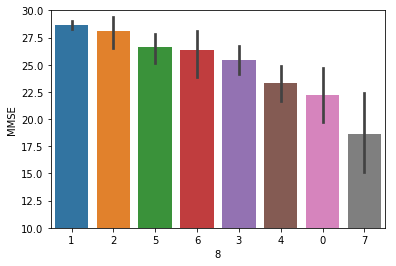

In [327]:
sns.barplot(x=8, y='MMSE', data=AmP_cluster_labels, 
            order=[1,2,5,6,3,4,0,7]
           )
plt.ylim(10,30)

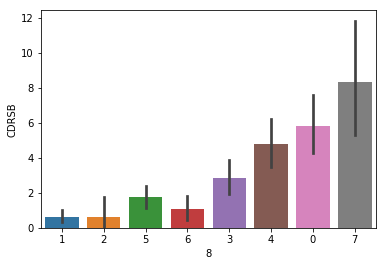

In [328]:
sns.barplot(x=8, y='CDRSB', data=AmP_cluster_labels, 
            order=[1,2,5,6,3,4,0,7]
           )

(10, 30)

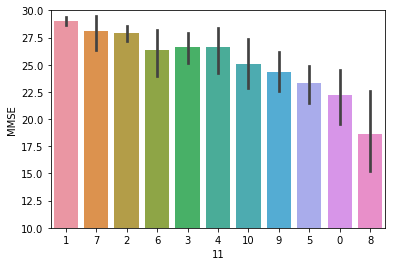

In [333]:
sns.barplot(x=11, y='MMSE', data=AmP_cluster_labels, 
            order=[1,7,2,6,3,4,10,9,5,0,8]
           )
plt.ylim(10,30)

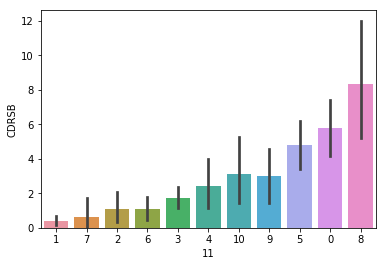

In [334]:
sns.barplot(x=11, y='CDRSB', data=AmP_cluster_labels, 
            order=[1,7,2,6,3,4,10,9,5,0,8]
           )

(50, 83.857921875000002)

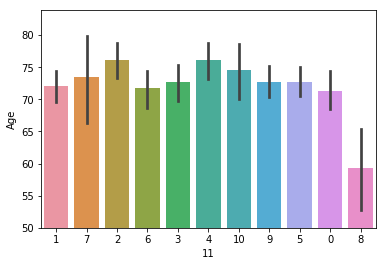

In [344]:
sns.barplot(x=11, y='Age', data=AmP_cluster_labels, 
            order=[1,7,2,6,3,4,10,9,5,0,8]
           )
plt.ylim(50)

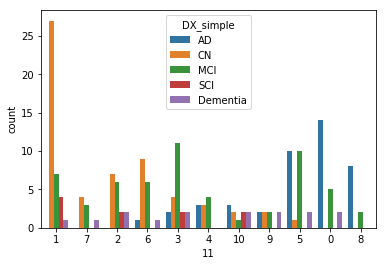

In [339]:
sns.countplot(x=11, hue='DX_simple', data=AmP_cluster_labels, 
              order=[1,7,2,6,3,4,10,9,5,0,8])

In [340]:
AmP_cluster_labels.loc[:,'ApoE'] = [1 if x > 0 else 0 for x in AmP_cluster_labels.ApoE.values]

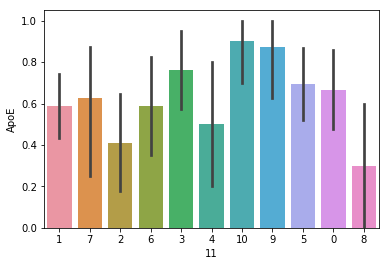

In [341]:
sns.barplot(x=11, y='ApoE', data=AmP_cluster_labels, 
            order=[1,7,2,6,3,4,10,9,5,0,8]
           )

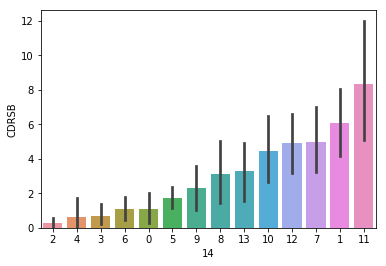

In [348]:
sns.barplot(x=14, y='CDRSB', data=AmP_cluster_labels, 
            order=[11,1,7,12,10,13,8,9,5,0,6,3,4,2][::-1]
           )

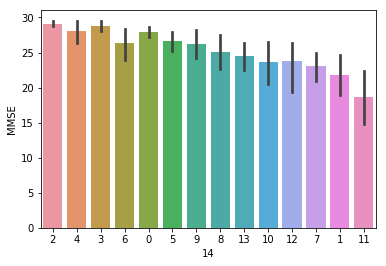

In [349]:
sns.barplot(x=14, y='MMSE', data=AmP_cluster_labels, 
            order=[11,1,7,12,10,13,8,9,5,0,6,3,4,2][::-1]
           )

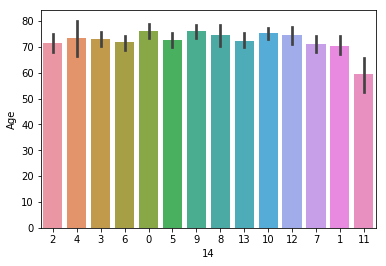

In [350]:
sns.barplot(x=14, y='Age', data=AmP_cluster_labels, 
            order=[11,1,7,12,10,13,8,9,5,0,6,3,4,2][::-1]
           )

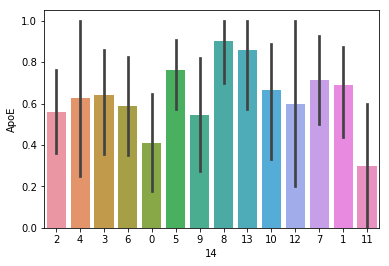

In [351]:
sns.barplot(x=14, y='ApoE', data=AmP_cluster_labels, 
            order=[11,1,7,12,10,13,8,9,5,0,6,3,4,2][::-1]
           )

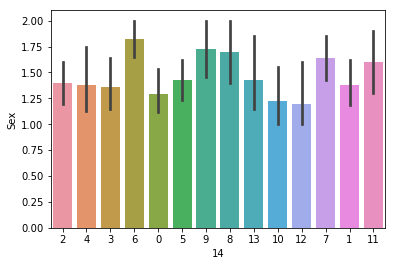

In [352]:
sns.barplot(x=14, y='Sex', data=AmP_cluster_labels, 
            order=[11,1,7,12,10,13,8,9,5,0,6,3,4,2][::-1]
           )

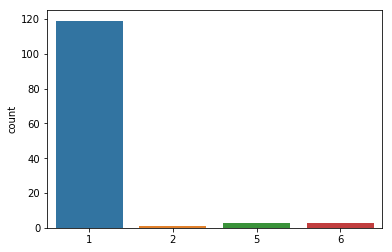

In [354]:
avg_clusters = pandas.DataFrame(index = np.unique(AmP_cluster_labels[8]),
                               columns = AmN_tau_probs.columns)
for k in np.unique(AmP_cluster_labels[8]):
    avg_clusters.loc[k] = all_probs.loc[AmP_cluster_labels[AmP_cluster_labels[8]==k].index
                                       ][AmN_tau_probs.columns].mean().values

AmN_predictions = pandas.DataFrame(index = AmN.index, 
                                   columns = np.unique(AmP_cluster_labels[8]))
for sub in AmN.index:
    svec = AmN_tau_probs.loc[sub,avg_clusters.dropna(1).columns]
    for k in avg_clusters.index:
        AmN_predictions.loc[sub, k] = stats.pearsonr(svec.values, avg_clusters.dropna(1).loc[k].values)[0]

AmN_vote = [np.argmax(AmN_predictions.loc[x].values) for x in AmN_predictions.index]
all_cluster_labels.loc[AmN_predictions.index,'Predicted_AmN_APp_k8'] = AmN_vote
sns.countplot(AmN_vote)

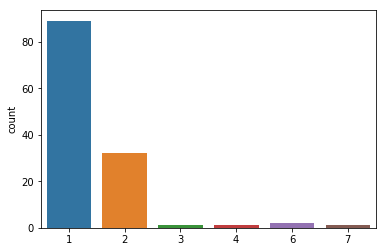

In [355]:
avg_clusters = pandas.DataFrame(index = np.unique(AmP_cluster_labels[11]),
                               columns = AmN_tau_probs.columns)
for k in np.unique(AmP_cluster_labels[11]):
    avg_clusters.loc[k] = all_probs.loc[AmP_cluster_labels[AmP_cluster_labels[11]==k].index
                                       ][AmN_tau_probs.columns].mean().values

AmN_predictions = pandas.DataFrame(index = AmN.index, 
                                   columns = np.unique(AmP_cluster_labels[11]))
for sub in AmN.index:
    svec = AmN_tau_probs.loc[sub,avg_clusters.dropna(1).columns]
    for k in avg_clusters.index:
        AmN_predictions.loc[sub, k] = stats.pearsonr(svec.values, avg_clusters.dropna(1).loc[k].values)[0]

AmN_vote = [np.argmax(AmN_predictions.loc[x].values) for x in AmN_predictions.index]
all_cluster_labels.loc[AmN_predictions.index,'Predicted_AmN_APp_k11'] = AmN_vote
sns.countplot(AmN_vote)

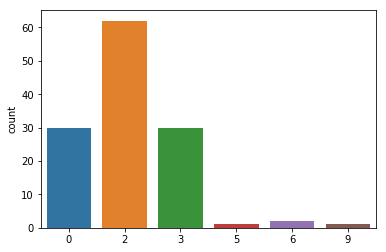

In [357]:
avg_clusters = pandas.DataFrame(index = np.unique(AmP_cluster_labels[14]),
                               columns = AmN_tau_probs.columns)
for k in np.unique(AmP_cluster_labels[14]):
    avg_clusters.loc[k] = all_probs.loc[AmP_cluster_labels[AmP_cluster_labels[14]==k].index
                                       ][AmN_tau_probs.columns].mean().values

AmN_predictions = pandas.DataFrame(index = AmN.index, 
                                   columns = np.unique(AmP_cluster_labels[14]))
for sub in AmN.index:
    svec = AmN_tau_probs.loc[sub,avg_clusters.dropna(1).columns]
    for k in avg_clusters.index:
        AmN_predictions.loc[sub, k] = stats.pearsonr(svec.values, avg_clusters.dropna(1).loc[k].values)[0]

AmN_vote = [np.argmax(AmN_predictions.loc[x].values) for x in AmN_predictions.index]
all_cluster_labels.loc[AmN_predictions.index,'Predicted_AmN_APp_k14'] = AmN_vote
sns.countplot(AmN_vote)

In [361]:
occipital = [9,8,10,11,12]
frontal = [13,7,1]
AmP_cluster_labels.loc[AmP_cluster_labels[AmP_cluster_labels[14].isin(occipital)].index,'subtypes'] = 0
AmP_cluster_labels.loc[AmP_cluster_labels[AmP_cluster_labels[14].isin(frontal)].index,'subtypes'] = 1

Ttest_indResult(statistic=0.75542991873477072, pvalue=0.45223753746375916)


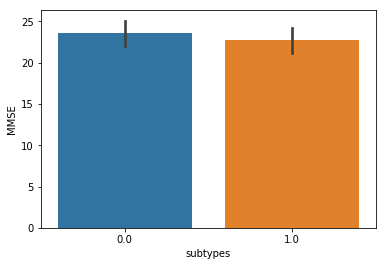

In [365]:
print(stats.ttest_ind(AmP_cluster_labels[AmP_cluster_labels.subtypes==0]['MMSE'].dropna(),
                     AmP_cluster_labels[AmP_cluster_labels.subtypes==1]['MMSE'].dropna()))
sns.barplot(x='subtypes', y = 'MMSE', data = AmP_cluster_labels)


Ttest_indResult(statistic=-0.61708953110349485, pvalue=0.53895018585807275)


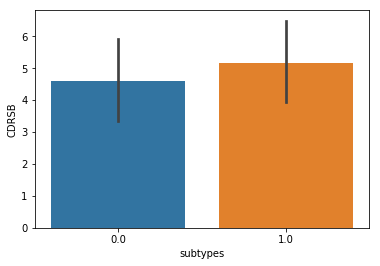

In [367]:
print(stats.ttest_ind(AmP_cluster_labels[AmP_cluster_labels.subtypes==0]['CDRSB'].dropna(),
                     AmP_cluster_labels[AmP_cluster_labels.subtypes==1]['CDRSB'].dropna()))
sns.barplot(x='subtypes', y = 'CDRSB', data = AmP_cluster_labels)


Ttest_indResult(statistic=-1.2290734550174294, pvalue=0.22264722494530786)


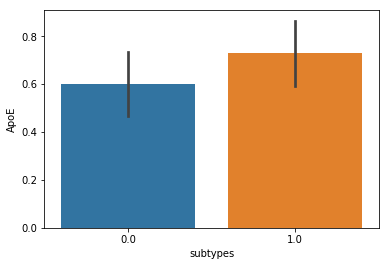

In [370]:
print(stats.ttest_ind(AmP_cluster_labels[AmP_cluster_labels.subtypes==0]['ApoE'].dropna(),
                     AmP_cluster_labels[AmP_cluster_labels.subtypes==1]['ApoE'].dropna()))
sns.barplot(x='subtypes', y = 'ApoE', data = AmP_cluster_labels)


Ttest_indResult(statistic=-0.54192741392778543, pvalue=0.58939381268891977)


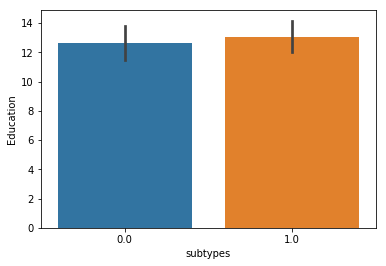

In [371]:
print(stats.ttest_ind(AmP_cluster_labels[AmP_cluster_labels.subtypes==0]['ApoE'].dropna(),
                     AmP_cluster_labels[AmP_cluster_labels.subtypes==1]['ApoE'].dropna()))
sns.barplot(x='subtypes', y = 'ApoE', data = AmP_cluster_labels)


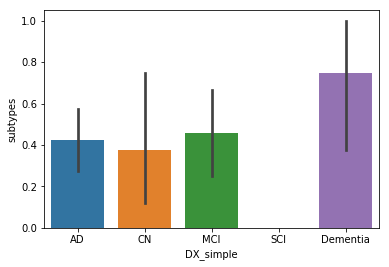

In [372]:
#print(stats.ttest_ind(AmP_cluster_labels[AmP_cluster_labels.subtypes==0]['ApoE'].dropna(),
#                     AmP_cluster_labels[AmP_cluster_labels.subtypes==1]['ApoE'].dropna()))
sns.barplot(x='DX_simple', y = 'subtypes', data = AmP_cluster_labels)
